In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

 # 한글폰트 설정

In [2]:
# 기본폰트 설정
plt.rc('font', family = 'NanumGothic')

# 마이너스 폰트 깨지는 문제 해결 방안
plt.rc('axes', unicode_minus = False)

# 폰트설정을 레티나로 하면 시각화 할 때 폰트가 선명함
%config InlineBackend.figure_format = 'retina'

# import matplotlib as mpl
# mpl.rcParams['font.family'] = 'NanumGothic'

In [3]:
# 폰트바뀌었는지 확인
print (plt.rcParams['font.family'] )

['NanumGothic']


 # 데이터 불러온 뒤 살펴보기

In [4]:
df = pd.read_csv('C:/Users/user/Desktop/workSpace/분석/데이터/공공데이터_국민건강검진/NHIS_OPEN_GJ_2018_v1.csv',
                 engine = 'python')
display(df.head())
display(df.shape)
# print(df.head())
# print(df.shape)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2018,1,2,7,48,160,60,79.5,1.5,1.5,...,12.0,1.0,NaN,N,NaN,NaN,NaN,NaN,NaN,2019-12-19
1,2018,2,1,6,26,170,55,69.3,1.2,0.8,...,47.0,1.0,Y,Y,0.0,NaN,NaN,NaN,N,2019-12-19
2,2018,3,1,12,28,165,70,85.0,0.8,0.8,...,21.0,2.0,Y,Y,0.0,NaN,NaN,NaN,N,2019-12-19
3,2018,4,2,15,27,150,45,71.5,0.4,0.3,...,13.0,1.0,NaN,Y,0.0,NaN,NaN,NaN,N,2019-12-19
4,2018,5,2,14,41,145,50,77.0,0.7,0.6,...,12.0,1.0,Y,N,NaN,NaN,NaN,NaN,NaN,2019-12-19


(1000000, 34)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999586 non-null   float64
 8   시력(좌)         999747 non-null   float64
 9   시력(우)         999734 non-null   float64
 10  청력(좌)         999783 non-null   float64
 11  청력(우)         999783 non-null   float64
 12  수축기혈압         994270 non-null   float64
 13  이완기혈압         994270 non-null   float64
 14  식전혈당(공복혈당)    994085 non-null   float64
 15  총콜레스테롤        332756 non-null   float64
 16  트리글리세라이드      332748 non-null   float64
 17  HDL콜레스테롤      332746 non-nul

 * 결측치가 존재하는 것을 알 수 있다.
 * 아예 데이터가 존재하지 않는 칼럼이 있는 것도 알 수 있다.

In [6]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [7]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부             object
구강검진수검여부         object
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석               object
데이터공개일자          object
dtype: object

# 결측치 보기

In [8]:
# isnull을 토이해 결측치를 True, False 값으로 전체를 살펴 볼 수 있고 sum을 하면 각 칼럼의 합계를 알 수 있다
# isna도 같은 결과를 알 수 있다.
df.isnull().sum()
# df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                414
시력(좌)               253
시력(우)               266
청력(좌)               217
청력(우)               217
수축기혈압              5730
이완기혈압              5730
식전혈당(공복혈당)         5915
총콜레스테롤           667244
트리글리세라이드         667252
HDL콜레스테롤         667254
LDL콜레스테롤         674122
혈색소                5914
요단백               10570
혈청크레아티닌            5906
(혈청지오티)AST         5906
(혈청지오티)ALT         5906
감마지티피              5909
흡연상태                234
음주여부             354943
구강검진수검여부              0
치아우식증유무          600008
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               622370
데이터공개일자               0
dtype: int64

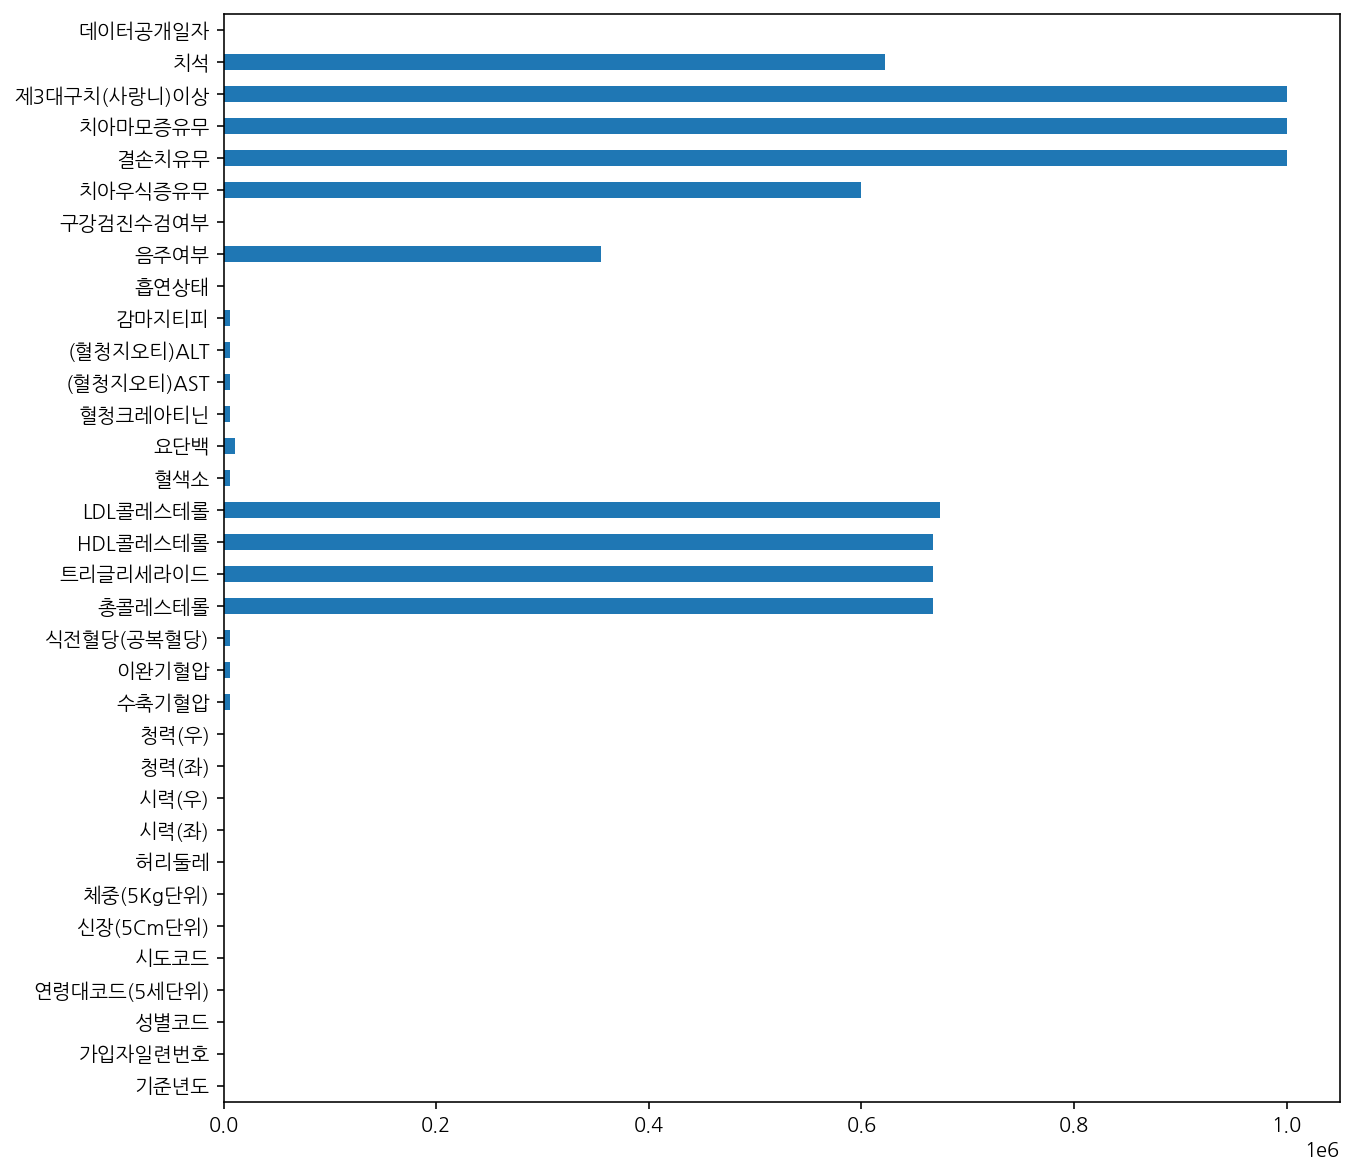

In [9]:
# 판다스에 내장 된 plot을 통해 시각화도 가능
df.isna().sum().plot.barh(figsize = (10,10))

 # 일부 데이터 요약

In [10]:
# 두 개 이상의 칼럼을 가져올 때 판다스에서는 [[]] 리스트의 형태로 가져와야 하기 때문에 두 번 감싼다.
df[['(혈청지오티)ALT', '(혈청지오티)AST']].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,8.0,21.0
1,45.0,35.0
2,47.0,77.0
3,10.0,19.0
4,26.0,26.0


In [11]:
df[['(혈청지오티)ALT', '(혈청지오티)AST']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  994094 non-null  float64
 1   (혈청지오티)AST  994094 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [12]:
df[['(혈청지오티)ALT', '(혈청지오티)AST']].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,994094.000000,994094.000000
mean,26.287882,26.301625
std,27.275675,26.367652
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,29.000000
max,5896.000000,9999.000000


 # value_counts()로 집계

In [13]:
df['성별코드'].value_counts()

1    535600
2    464400
Name: 성별코드, dtype: int64

 # groupby와 pivot_table 사용

 ## groupby

In [14]:
# groupby로 성별코드를 그룹화한다.
df.groupby(['성별코드'])['가입자일련번호'].count()

성별코드
1    535600
2    464400
Name: 가입자일련번호, dtype: int64

In [15]:
df.groupby(['성별코드', '음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     N            6
      Y       416497
2     N            5
      Y       228549
Name: 가입자일련번호, dtype: int64

In [16]:
df.groupby(['성별코드', '음주여부'])['감마지티피'].mean()

성별코드  음주여부
1     N       79.500000
      Y       53.739738
2     N       13.200000
      Y       23.949196
Name: 감마지티피, dtype: float64

In [17]:
df.groupby(['성별코드', '음주여부'])['감마지티피'].describe()

count       mean         std   min    25%   50%    75%    max
성별코드 음주여부                                                                  
1    N          6.0  79.500000  141.524203  15.0  16.75  21.5  32.25  368.0
     Y     415735.0  53.739738   65.508947   1.0  23.00  35.0  60.00  999.0
2    N          5.0  13.200000    6.379655   8.0   9.00  12.0  13.00   24.0
     Y     228055.0  23.949196   31.766087   1.0  13.00  17.0  24.00  999.0

In [18]:
# agg를 활용하면 원하는 결과를 선택해 출력이 가능하다.
df.groupby(['성별코드', '음주여부'])['감마지티피'].agg(['count', 'mean', 'median'])

count       mean  median
성별코드 음주여부                           
1    N          6  79.500000    21.5
     Y     415735  53.739738    35.0
2    N          5  13.200000    12.0
     Y     228055  23.949196    17.0

In [19]:
# pivot_table의 디폴트는 mean을 출력
df.pivot_table(index = '음주여부', values = '가입자일련번호', aggfunc = 'count')

,가입자일련번호
음주여부,
N,11
Y,645046


 * pivot_table과 groupby의 차이는 pivot_table은 속도가 좀 더 느리지만, 데이터프레임 형태로 결과를 도출한다

In [20]:
# 음주여부와 감마지티피의 평균
pd.pivot_table(df, index = '음주여부', values = '감마지티피', aggfunc = ['mean', 'median'])
# df.pivot_table(index = '음주여부', values = '감마지티피', aggfunc = ['mean', 'median'])

,mean,median
,감마지티피,감마지티피
음주여부,,
N,49.363636,16.0
Y,43.186791,27.0


In [21]:
# afffunc에 descirbe를 사용할 수 있다.
pd.pivot_table(df, index = ['성별코드', '음주여부'], values = '감마지티피', aggfunc = 'describe')

25%   50%    75%     count    max       mean   min         std
성별코드 음주여부                                                                  
1    N     16.75  21.5  32.25       6.0  368.0  79.500000  15.0  141.524203
     Y     23.00  35.0  60.00  415735.0  999.0  53.739738   1.0   65.508947
2    N      9.00  12.0  13.00       5.0   24.0  13.200000   8.0    6.379655
     Y     13.00  17.0  24.00  228055.0  999.0  23.949196   1.0   31.766087

 # 데이터 시각화

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E80765250>,
      dtype=object)

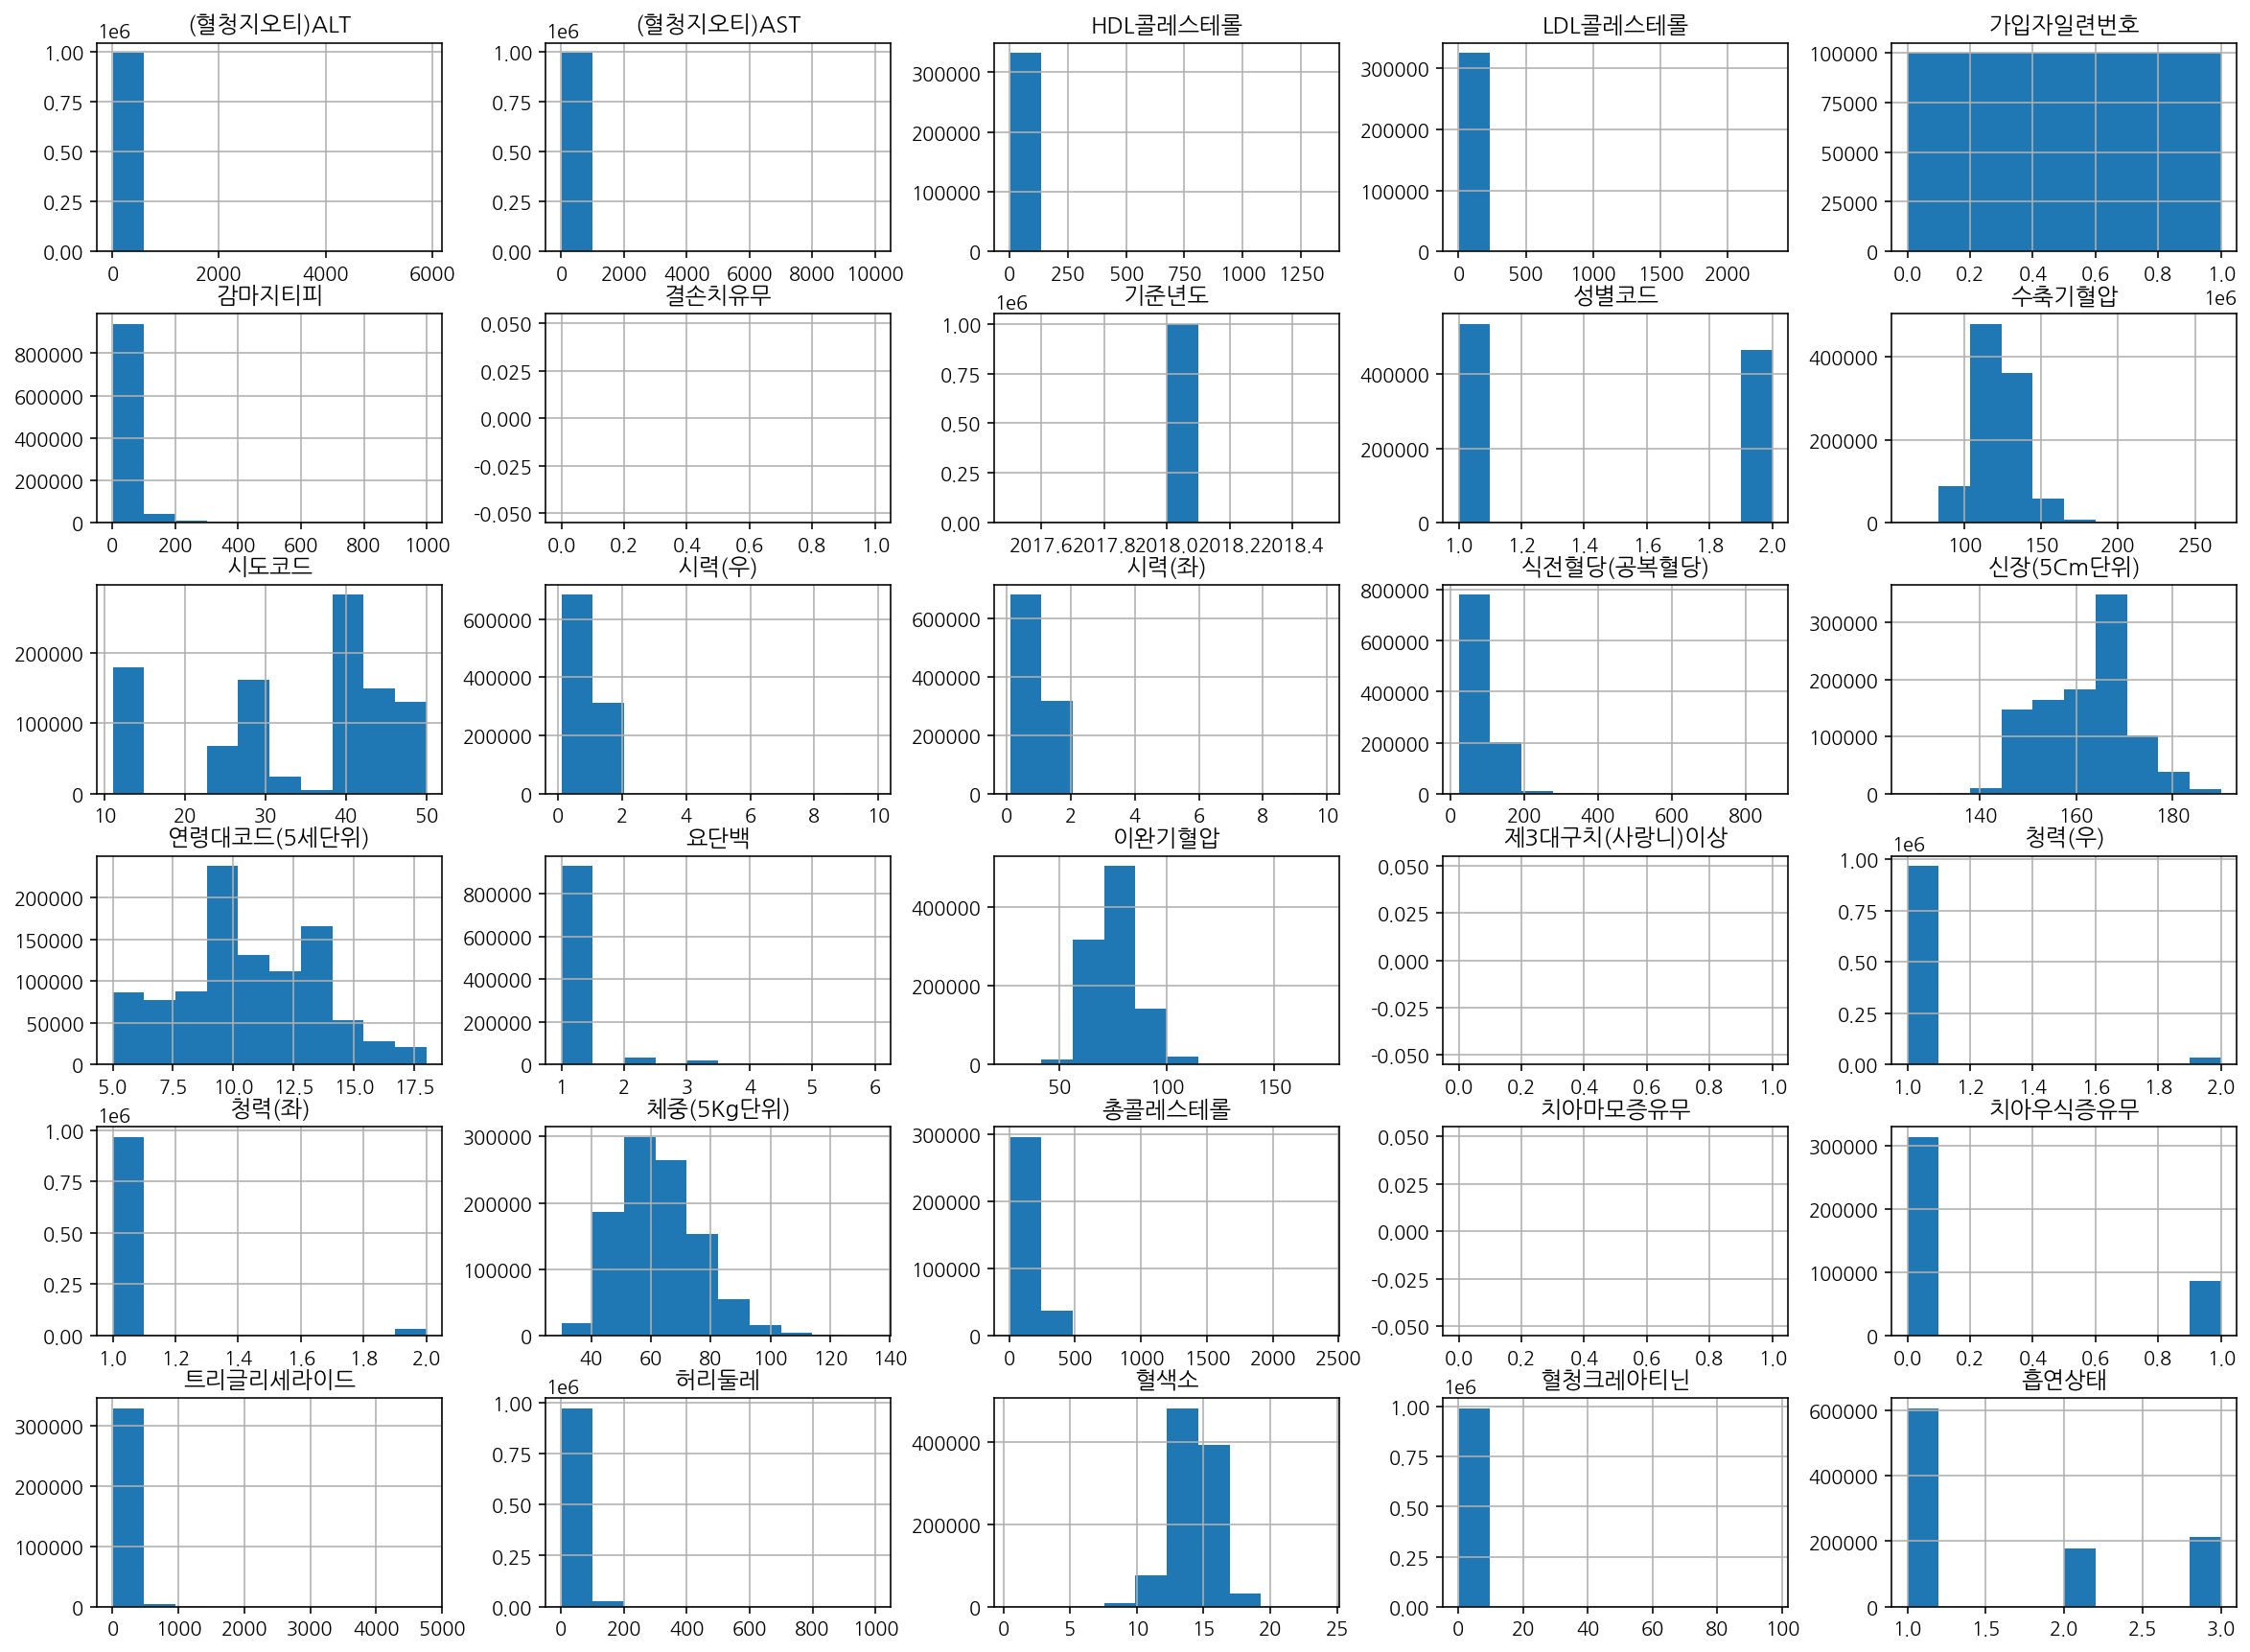

In [22]:
df.hist(figsize = (20, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E8287B970>,
      dtype=object)

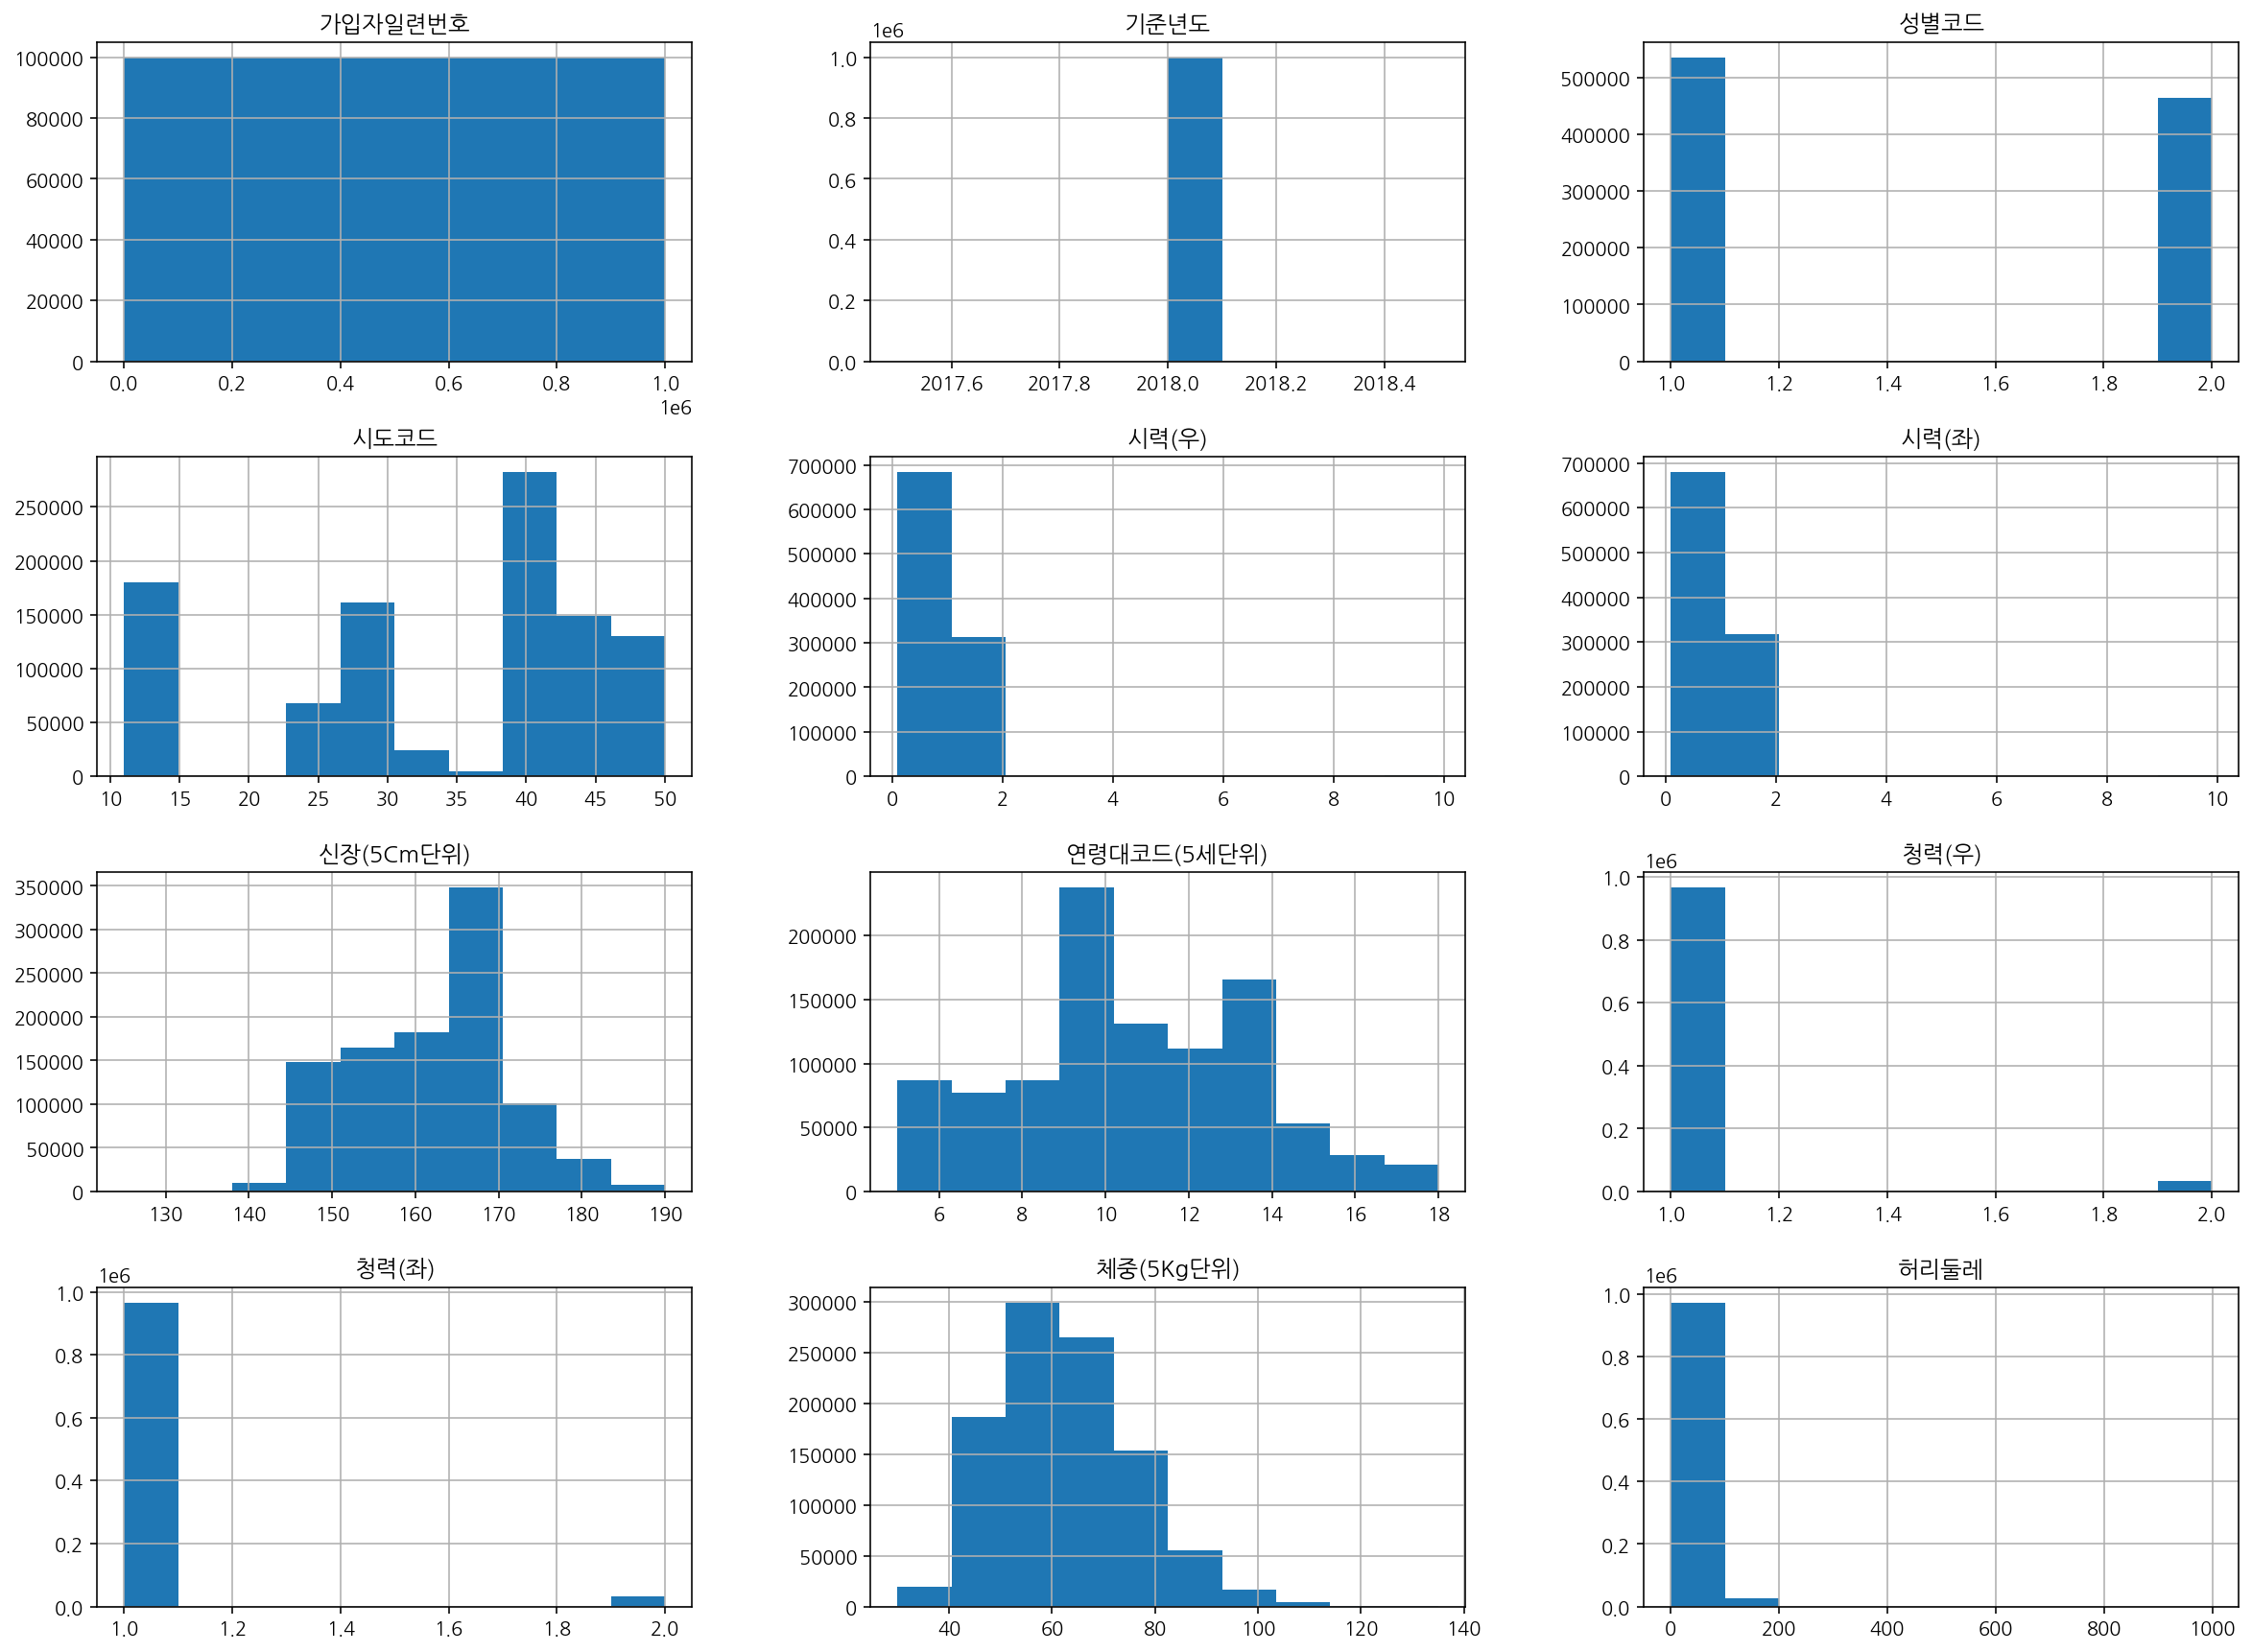

In [23]:
# 판다스의 슬라이싱을 이용해 12개 컬럼으로 히스토그램 표현
# [행, 열]

df.iloc[:, :12].hist(figsize = (20, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E82AC5970>,
      dtype=object)

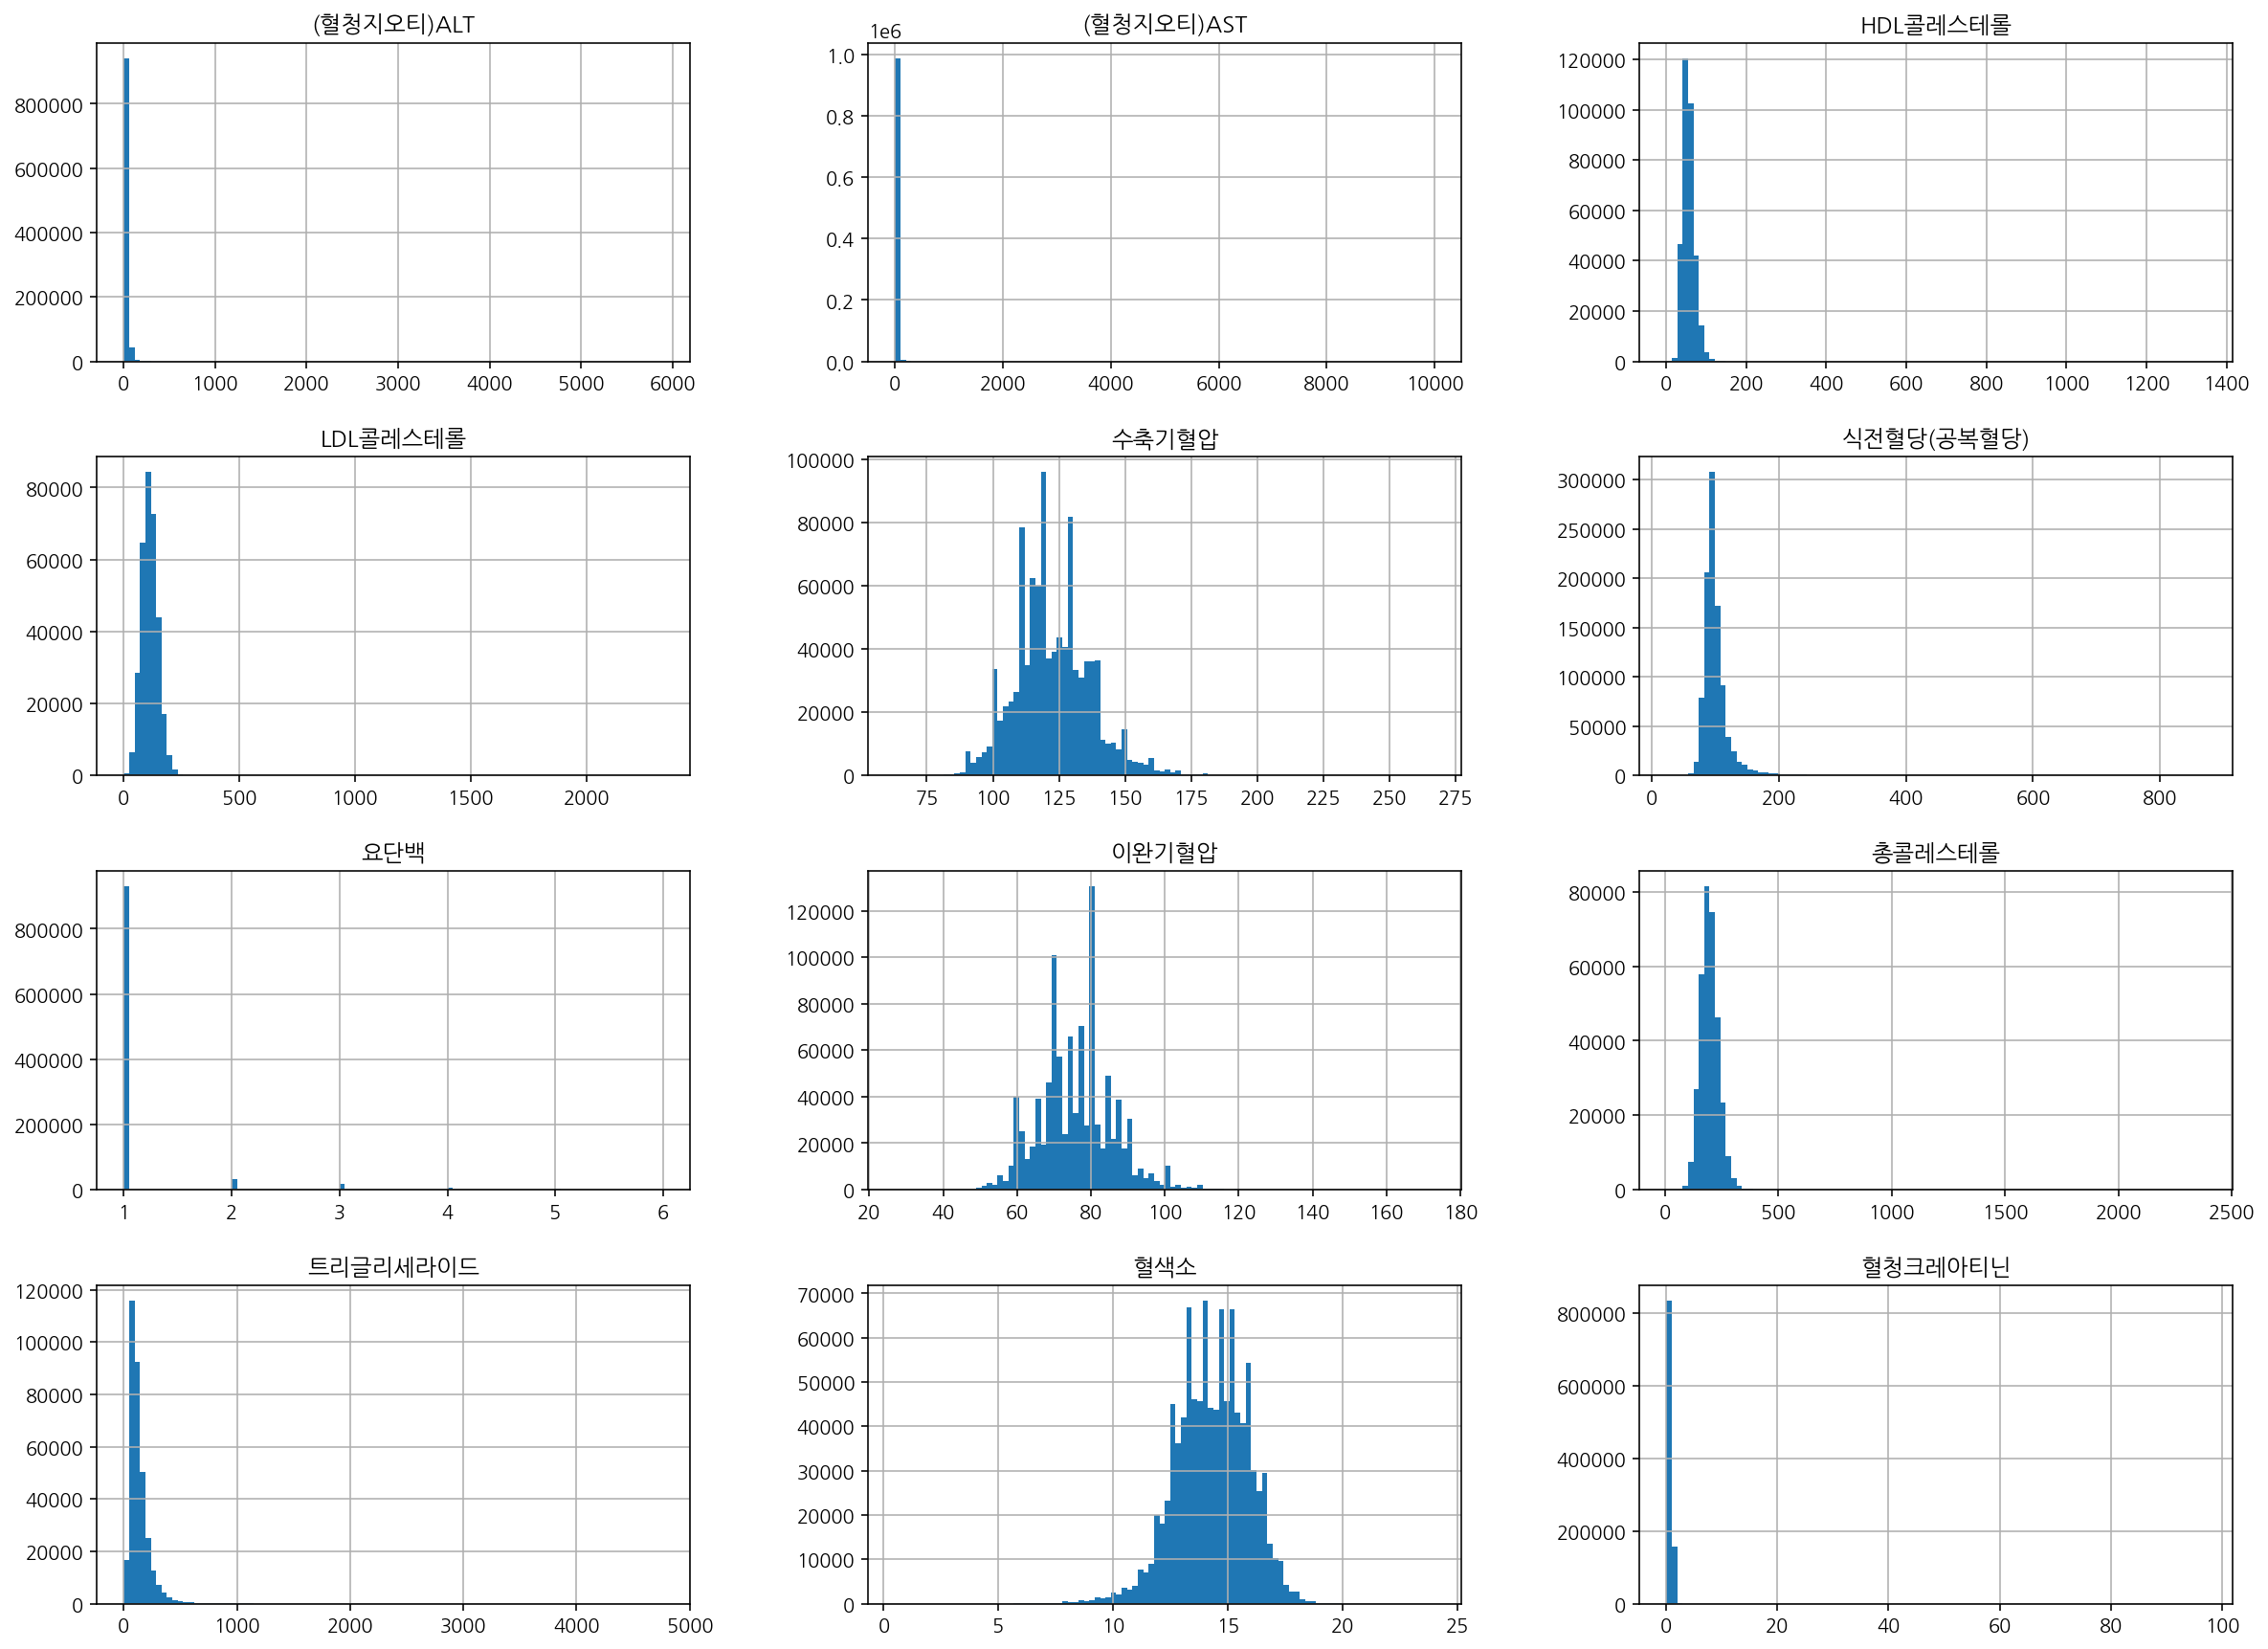

In [24]:
# 판다스의 슬라이싱을 이용해 12번째부터 23번째까지 칼럼으로 히스토그램 표현
df.iloc[:, 12:24].hist(figsize = (20, 15), bins = 100)    # bins는 막대의 개수를 정해 더 세밀한 결과를 알 수 있다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E840C9100>,
      dtype=object)

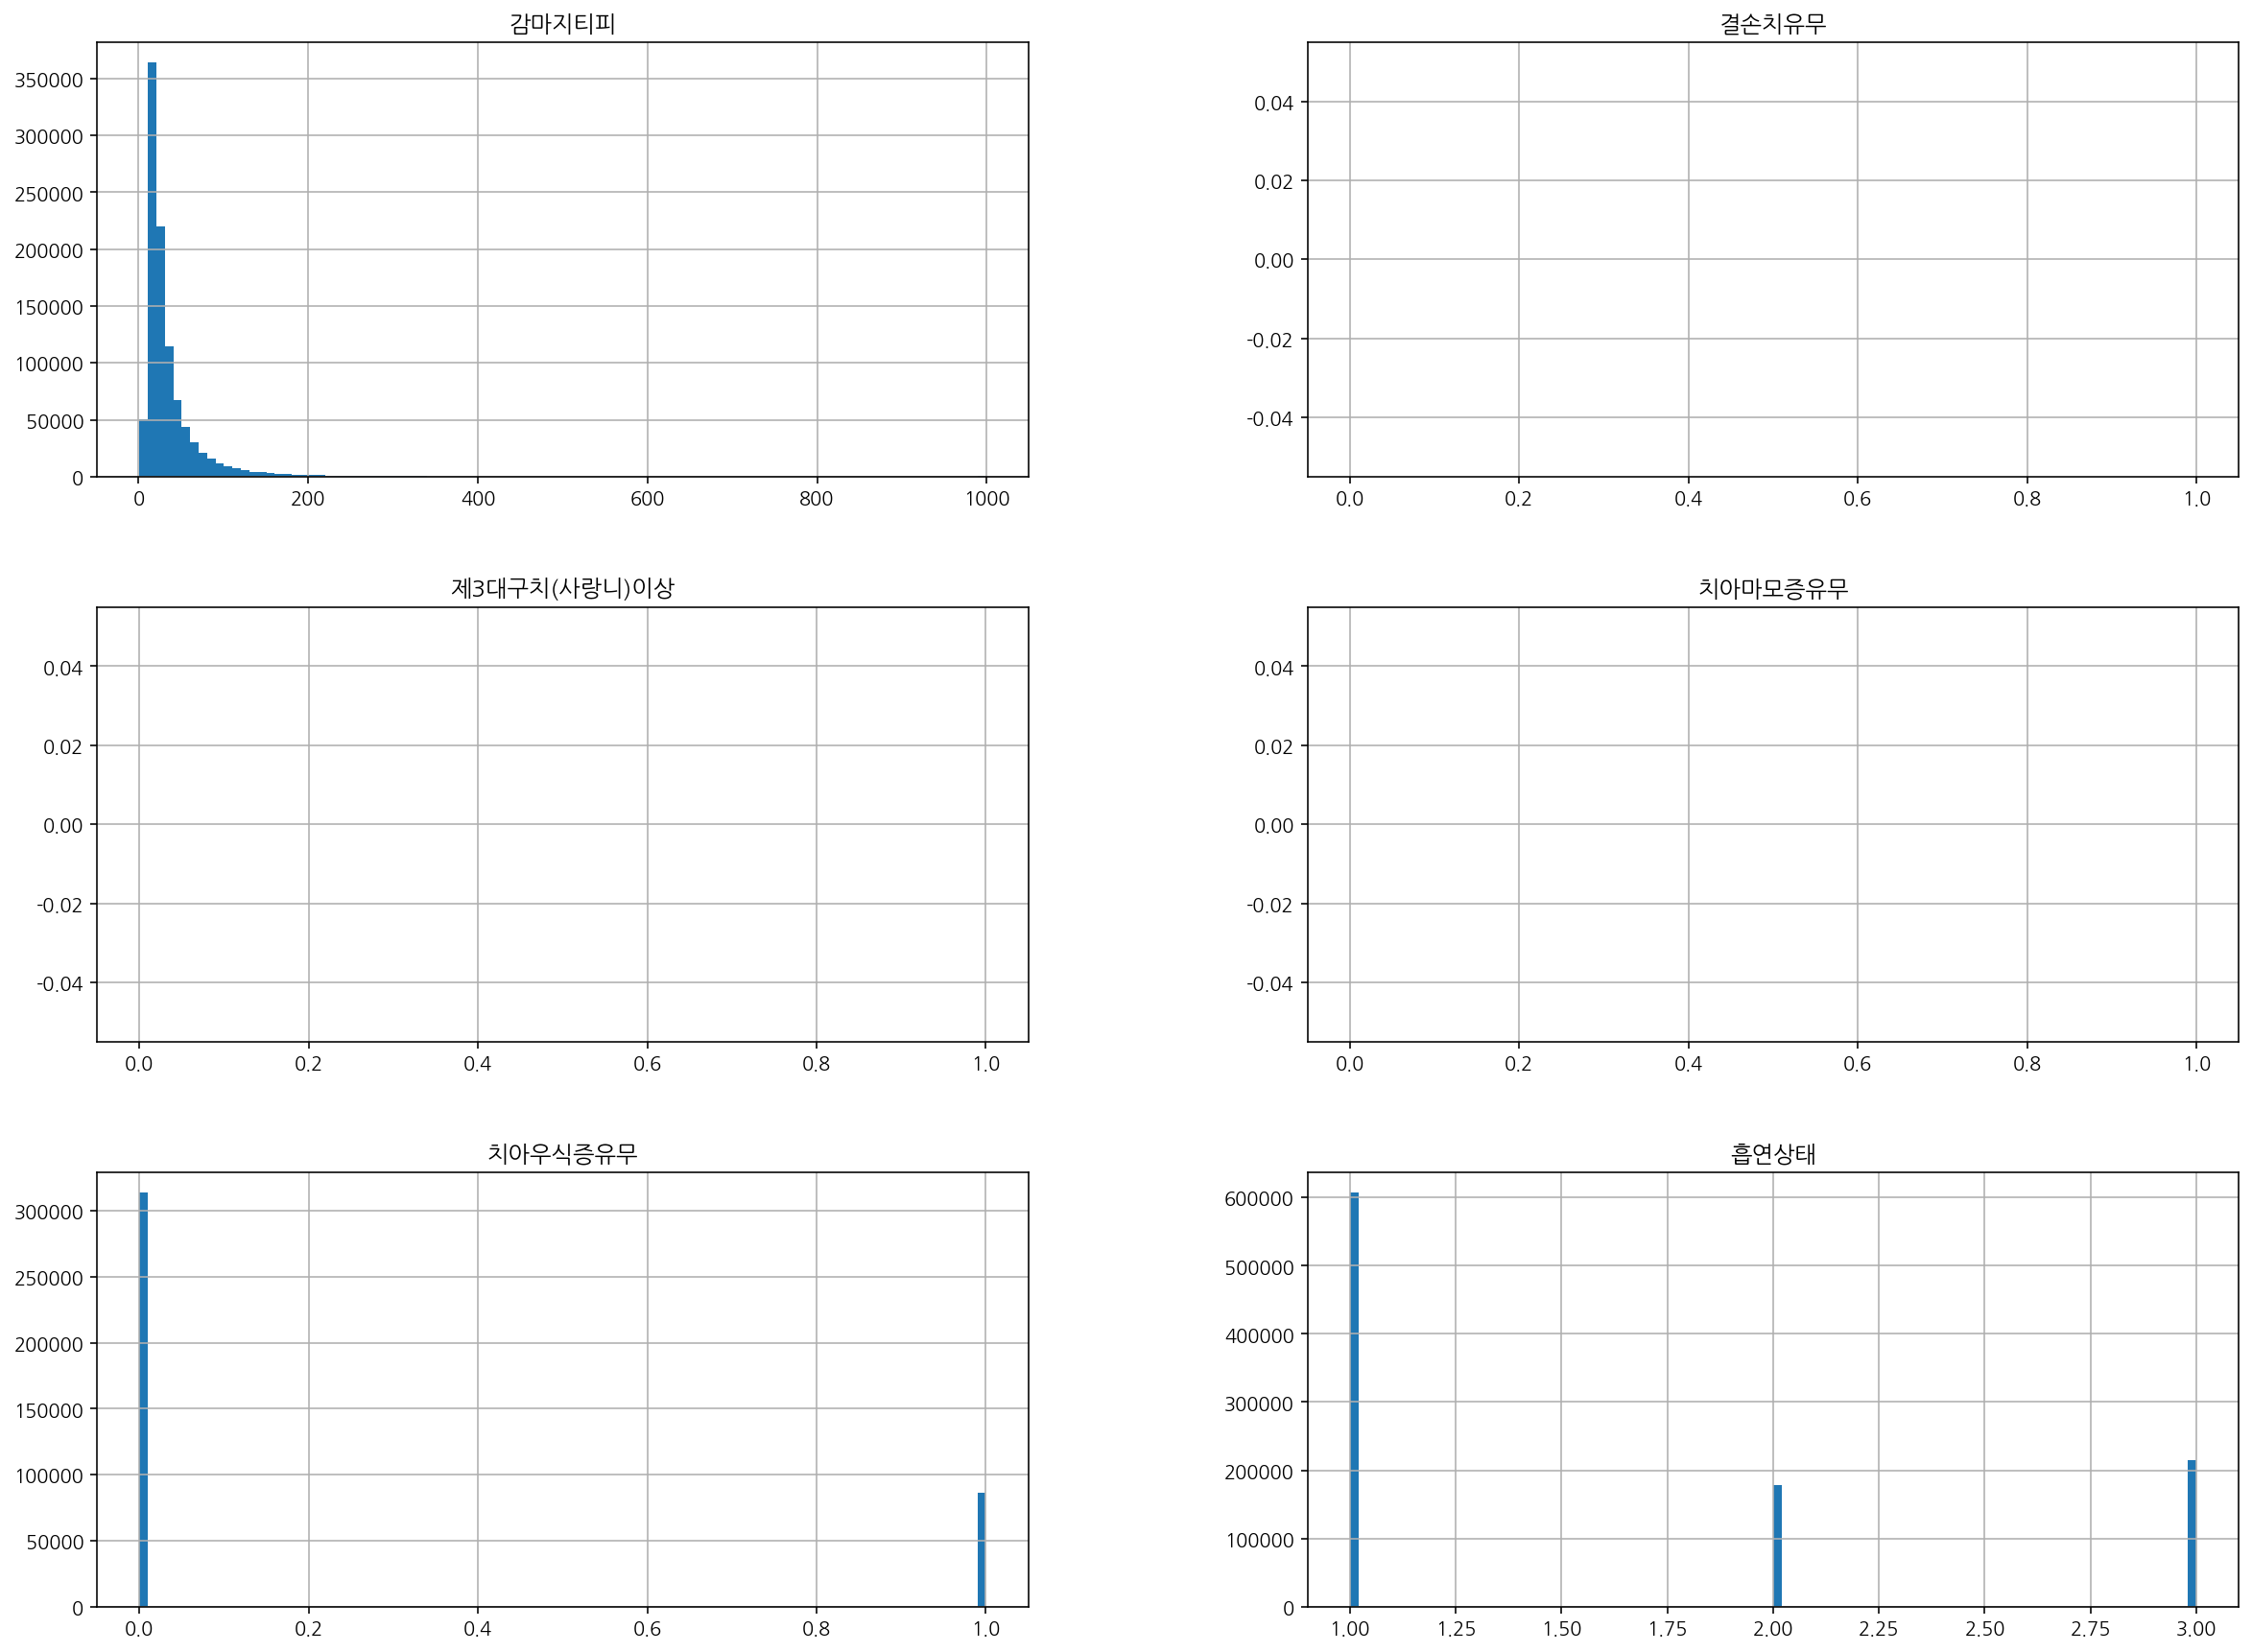

In [25]:
df.iloc[:, 24:].hist(figsize = (20, 15), bins = 100)    # bins는 막대의 개수를 정해 더 세밀한 결과를 알 수 있다.

 # seaborn 사용

 ## 샘플데이터 추출

In [26]:
df_sample = df.sample(10000, random_state = 1)
df_sample.shape

(10000, 34)

 ## 범주형데이터 시각화

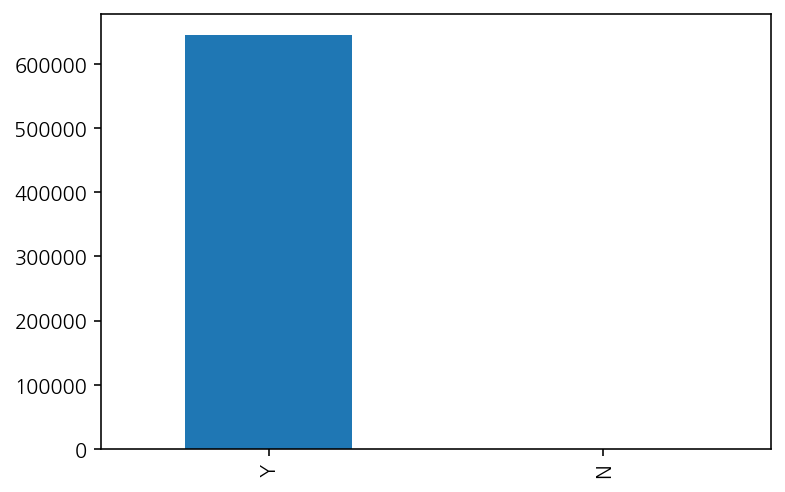

In [27]:
df['음주여부'].value_counts().plot.bar()

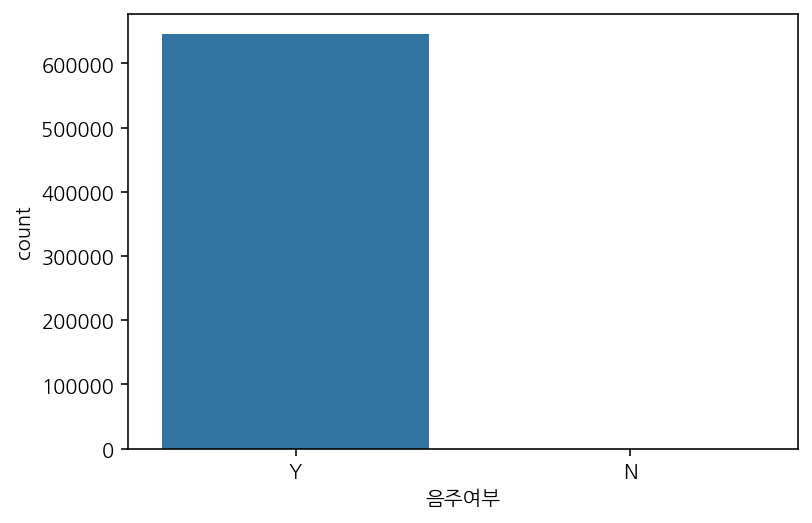

In [28]:
sns.countplot(x = '음주여부', data = df)

 * 위의 결과로 음주여부의 미응답자는 결측값으로 측정된 것으로 간주된다.
 * 따라서, 결측값을 미응답자로 바꾼다.

In [29]:
df = df.replace({'음주여부': {np.nan: 'N'}})

 ## hue 옵션 사용

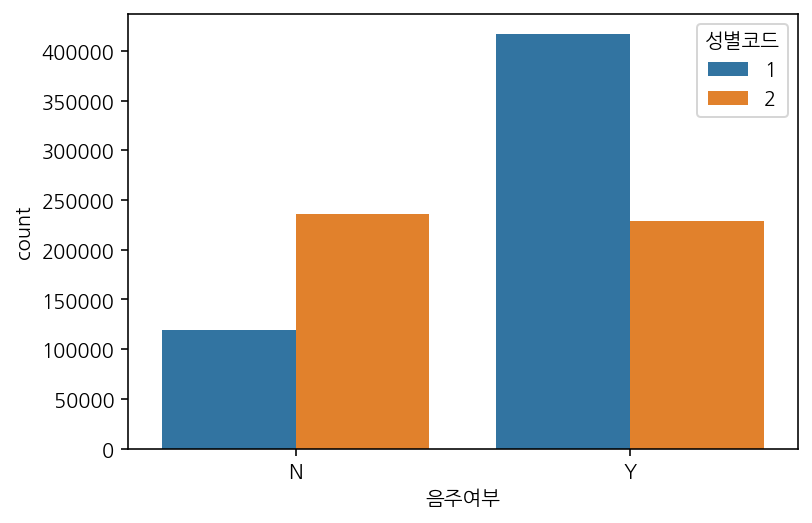

In [30]:
sns.countplot(data = df, x = '음주여부', hue = '성별코드')

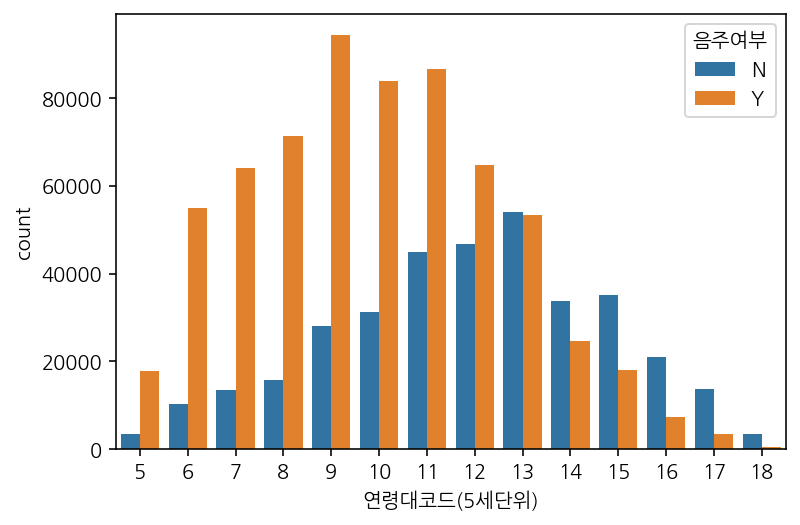

In [31]:
# 연령대별 음주여부
sns.countplot(data = df, x = '연령대코드(5세단위)', hue = '음주여부')

 # 키와 몸무게를 countplot

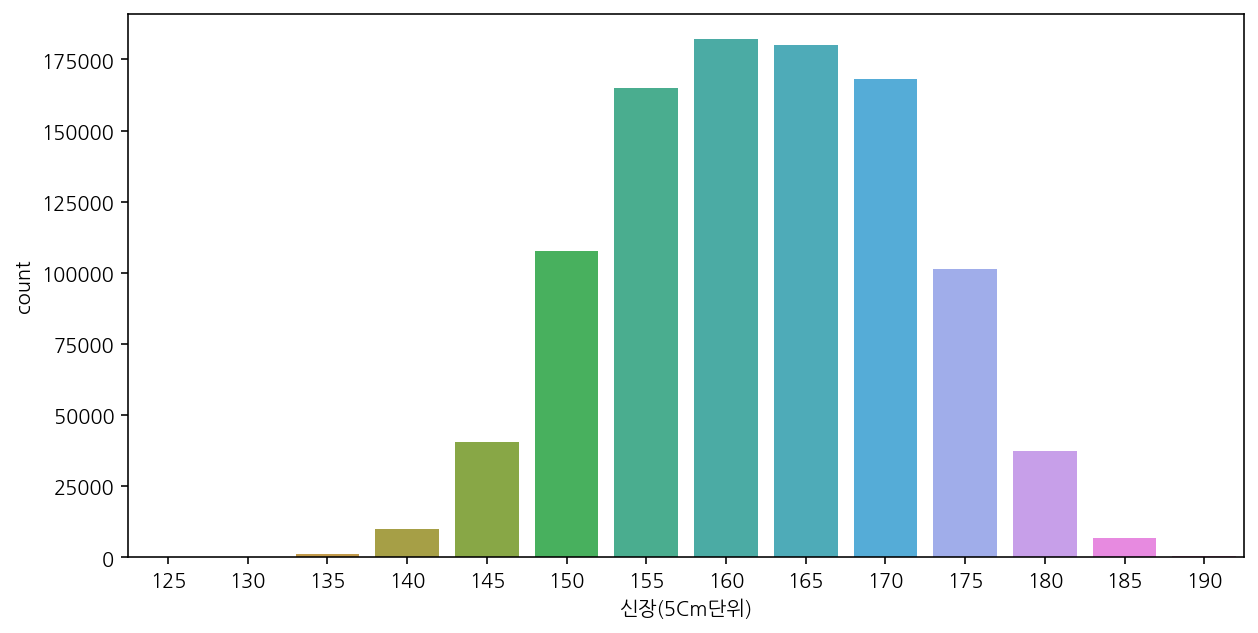

In [32]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = '신장(5Cm단위)')

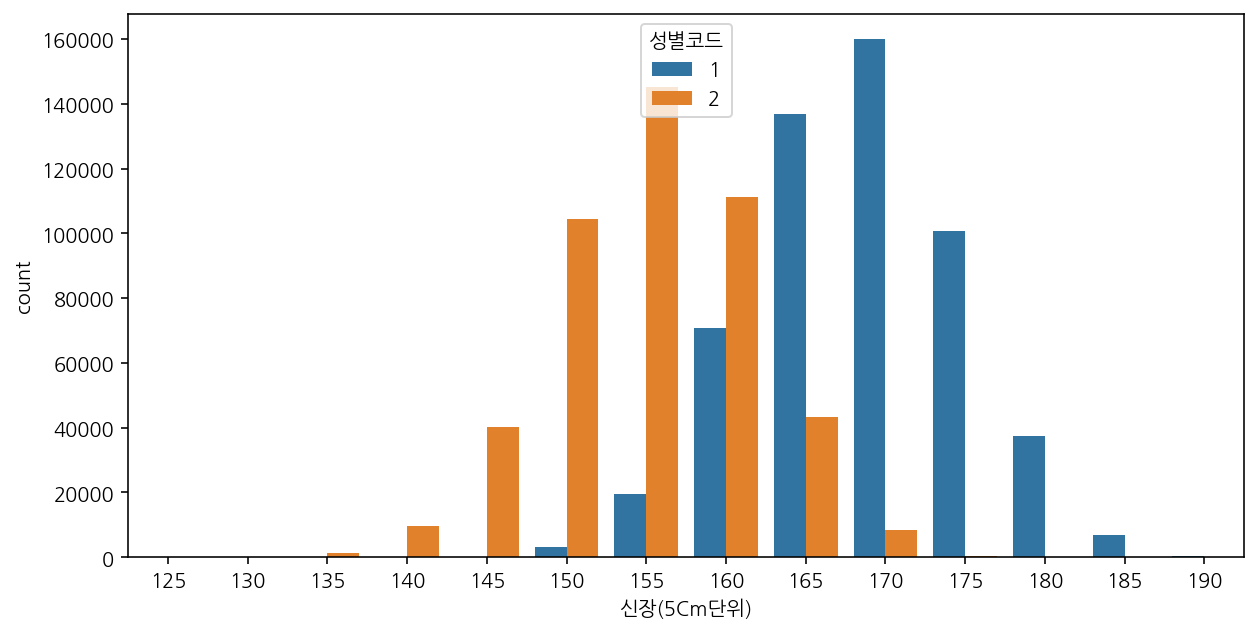

In [33]:
plt.figure(figsize = (10,5))

sns.countplot(data = df, x = '신장(5Cm단위)', hue = '성별코드')

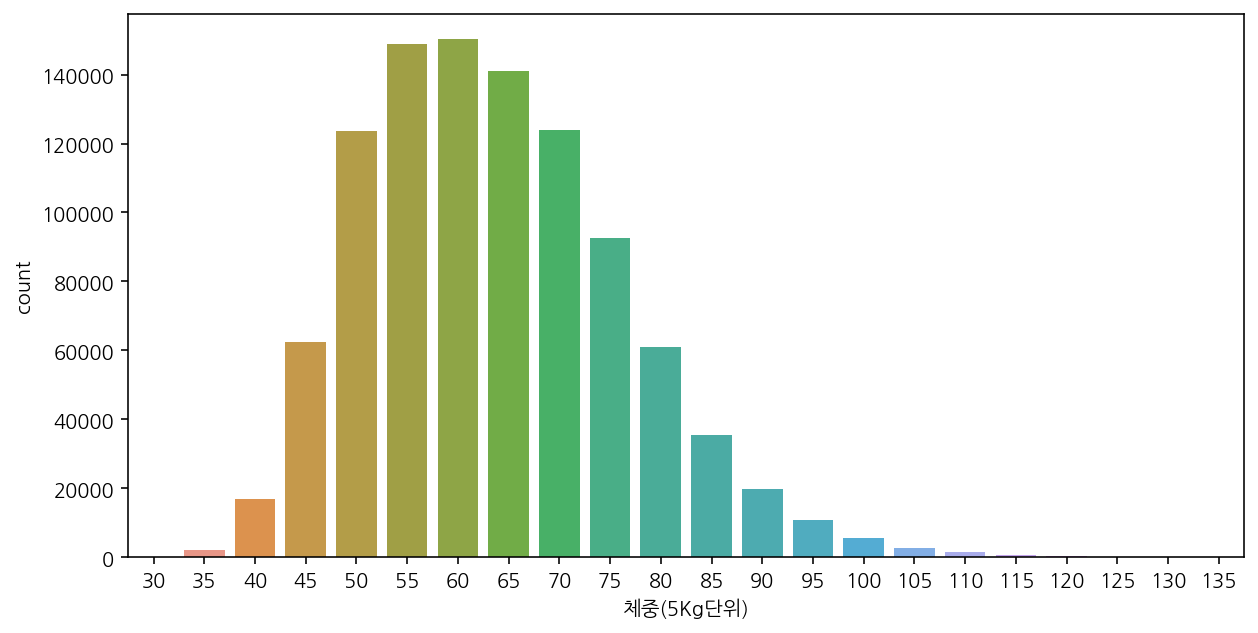

In [34]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = '체중(5Kg단위)')

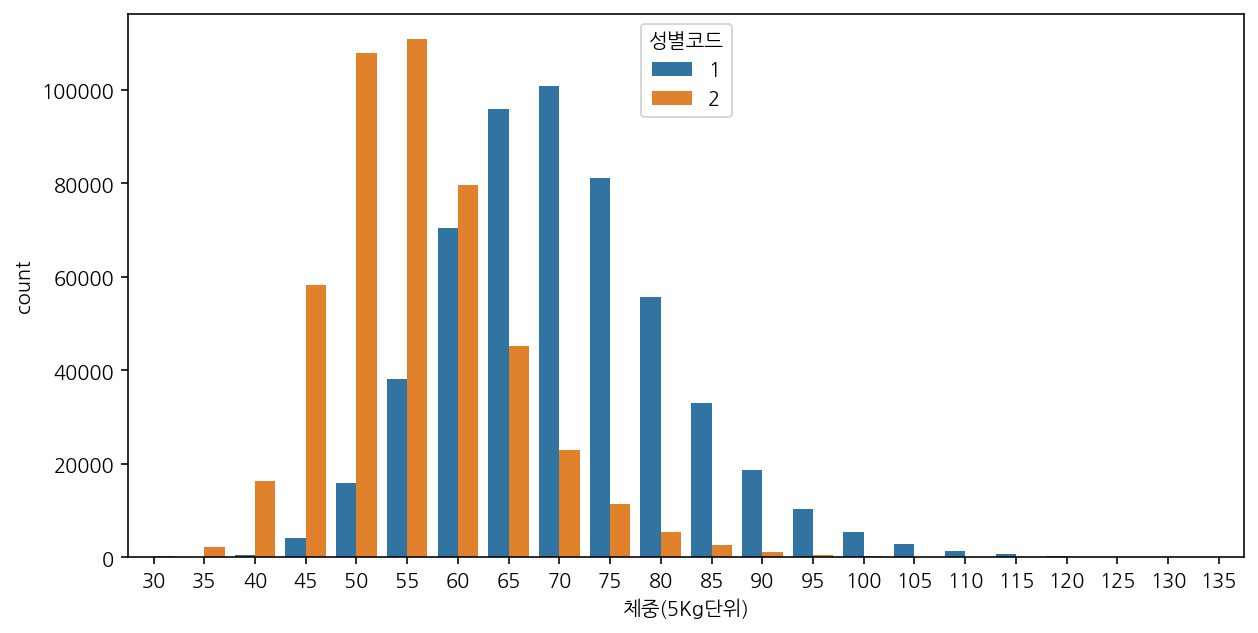

In [35]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = '체중(5Kg단위)', hue = '성별코드')

 # barplot - 수치형, 범주형 데이터 시각화

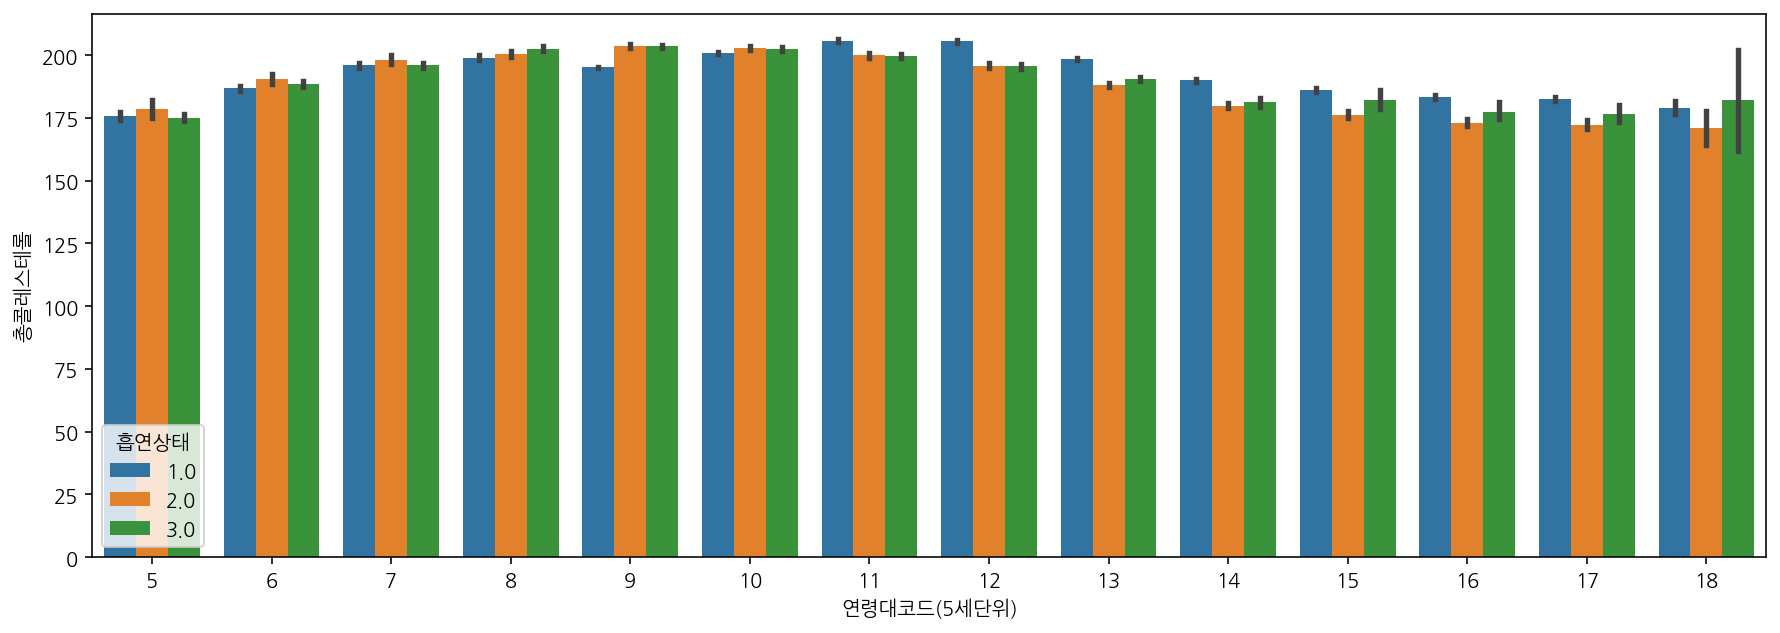

In [36]:
# 연령대코드와 총 콜레스테롤 확인
plt.figure(figsize = (15, 5))
sns.barplot(data = df, x = '연령대코드(5세단위)', y = '총콜레스테롤', hue = '흡연상태')

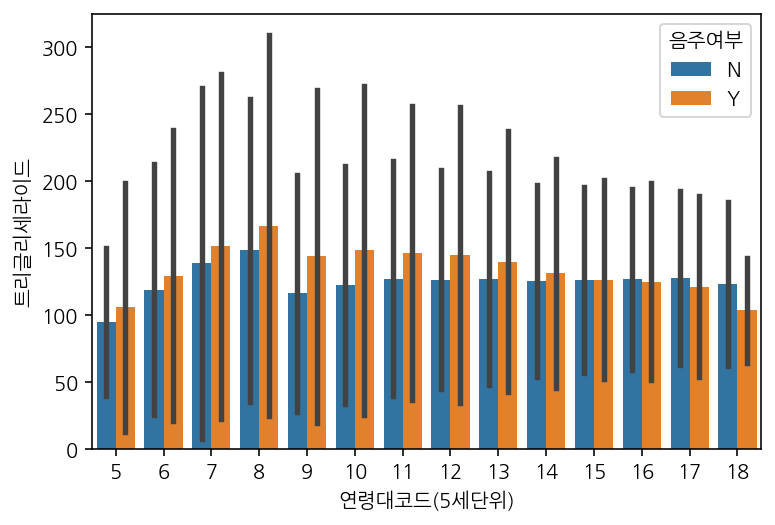

In [37]:
sns.barplot(data = df, x = '연령대코드(5세단위)', y = '트리글리세라이드', hue = '음주여부', ci = 'sd')
# ci는 신뢰구간을 뜻한다. 디폴트는 0.95다. 원하지 않는다면 ci = None

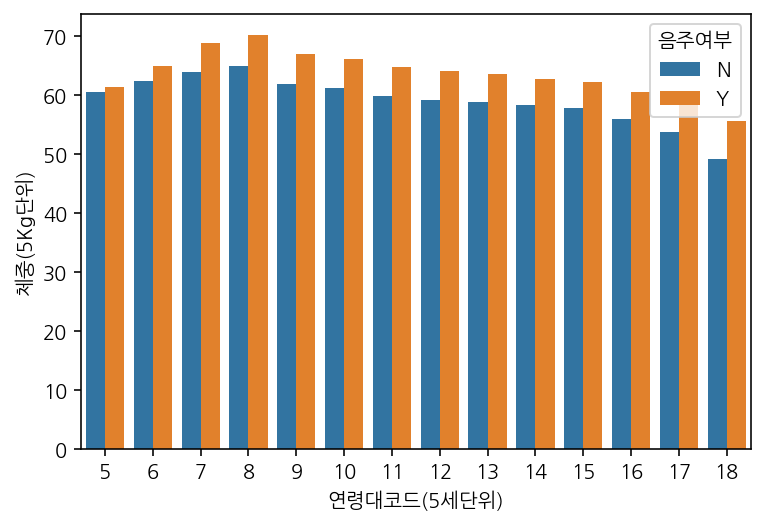

In [38]:
sns.barplot(data = df, x = '연령대코드(5세단위)', y = '체중(5Kg단위)', hue = '음주여부', ci = None)

 # lineplot와 pointplot

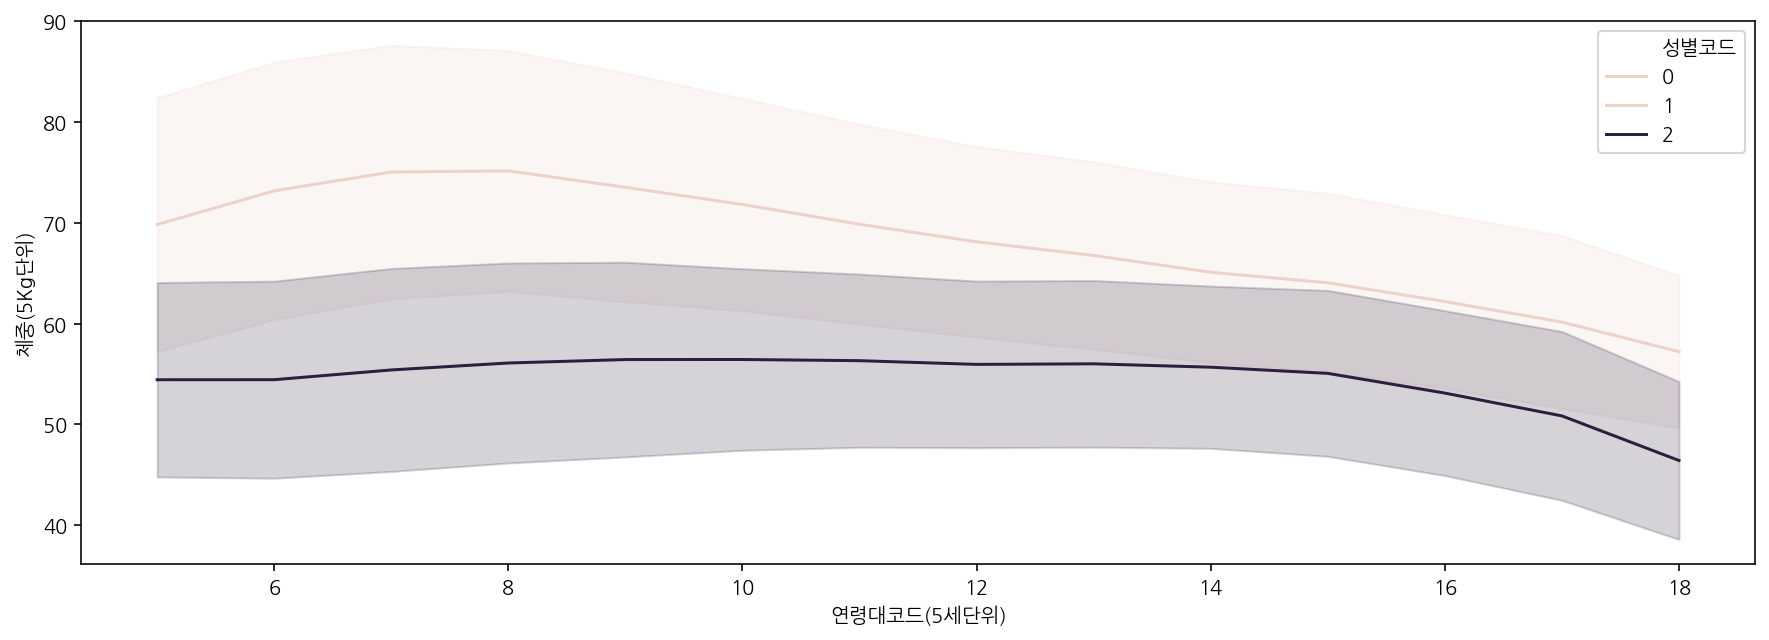

In [39]:
plt.figure(figsize = (15, 5))
sns.lineplot(data = df, x = '연령대코드(5세단위)', y = '체중(5Kg단위)', hue = '성별코드', ci = 'sd')

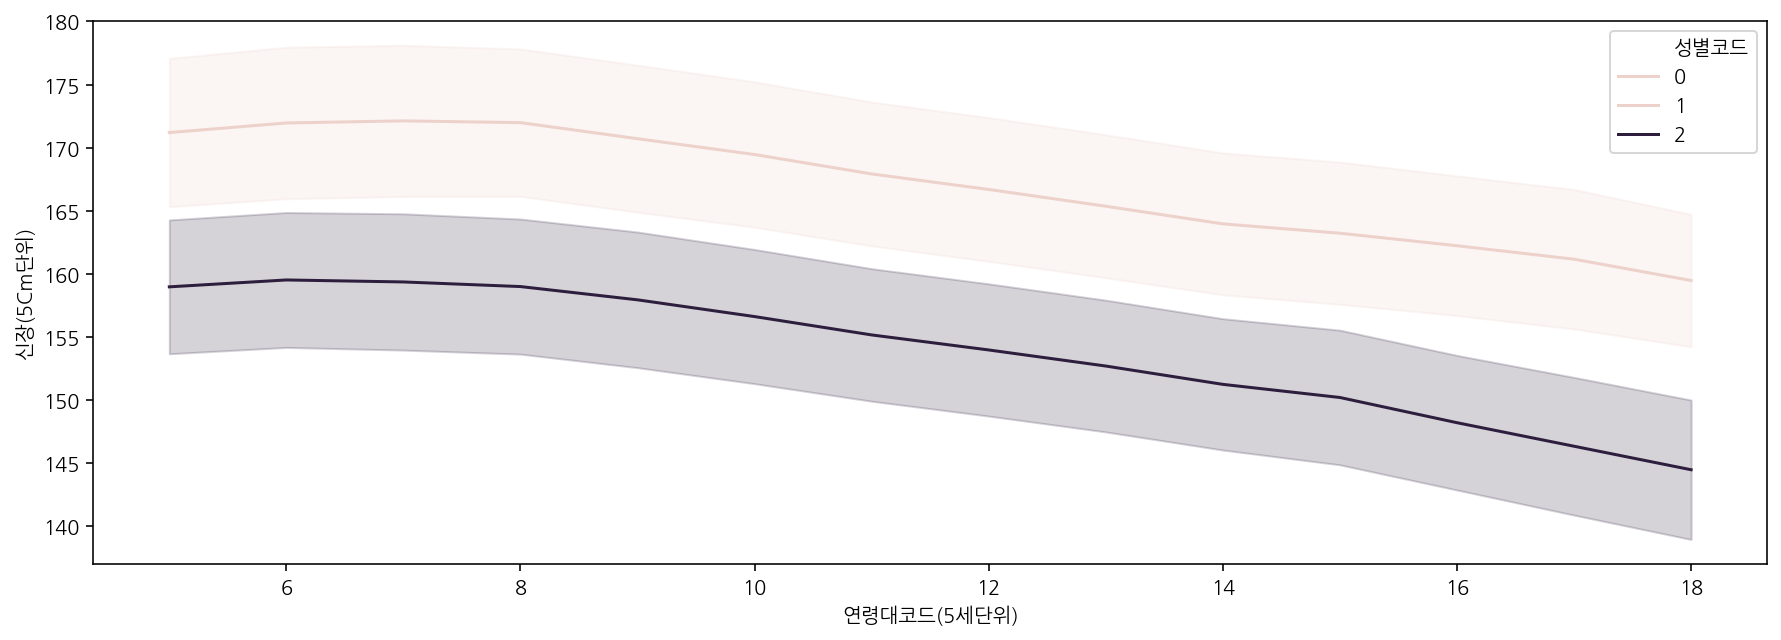

In [40]:
plt.figure(figsize = (15, 5))
sns.lineplot(data = df, x = '연령대코드(5세단위)', y = '신장(5Cm단위)', hue = '성별코드', ci = 'sd')

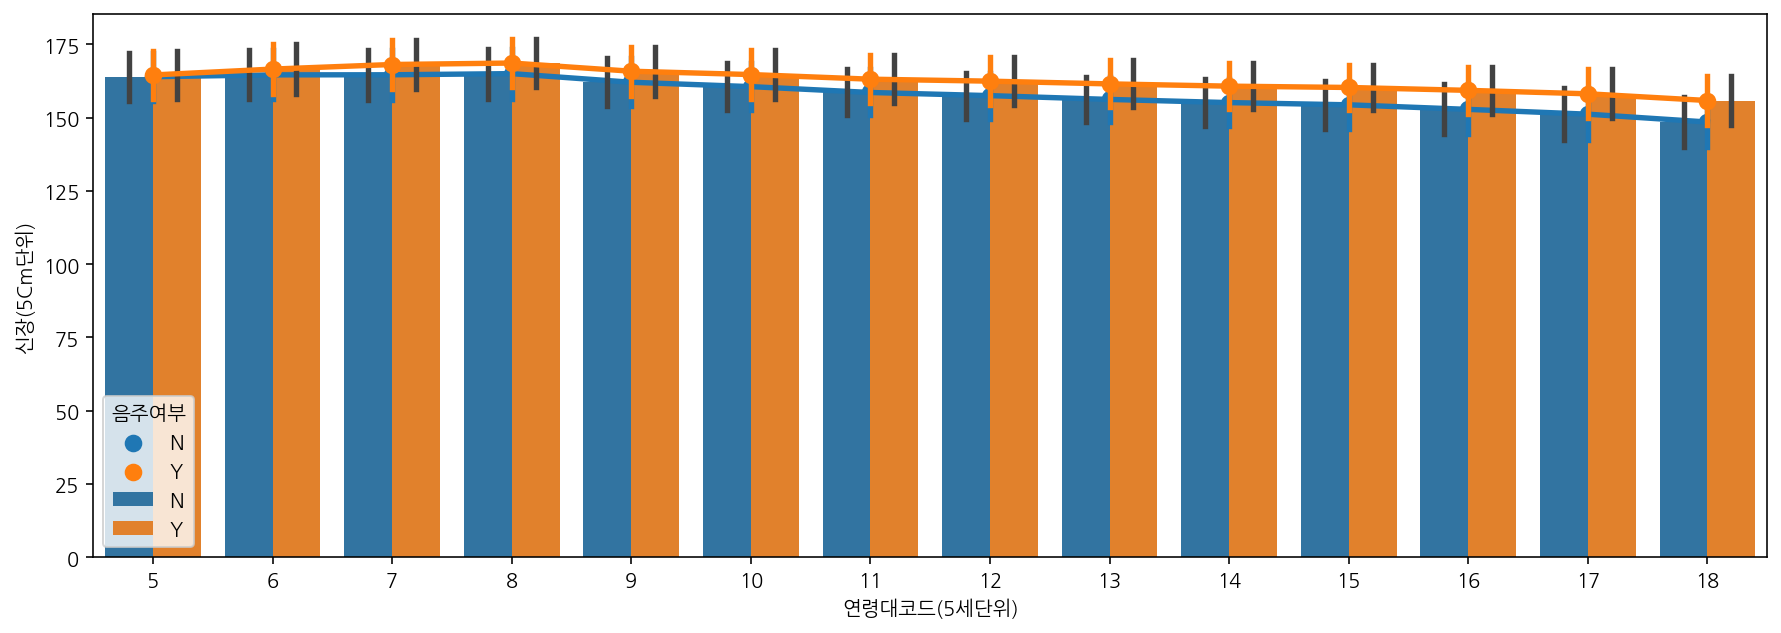

In [41]:
plt.figure(figsize = (15, 5))
sns.barplot(data = df, x = '연령대코드(5세단위)', y = '신장(5Cm단위)', hue = '음주여부', ci = 'sd')
sns.pointplot(data = df, x = '연령대코드(5세단위)', y = '신장(5Cm단위)', hue = '음주여부', ci = 'sd')
# lineplot은 그림자로 신뢰구간이 나온다면 pointplot은 bar로 표현됨

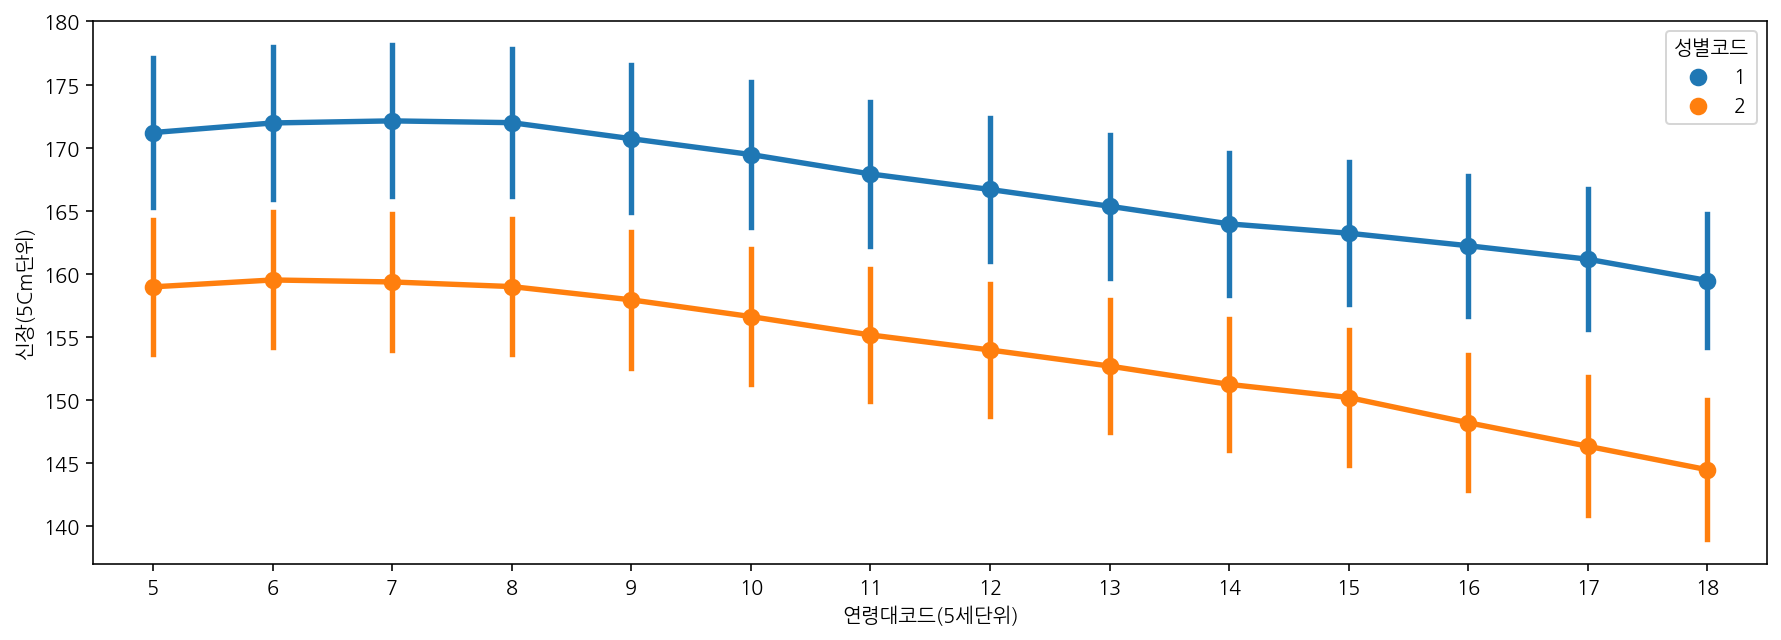

In [42]:
plt.figure(figsize = (15, 5))
sns.pointplot(data = df, x = '연령대코드(5세단위)', y = '신장(5Cm단위)', hue = '성별코드', ci = 'sd')

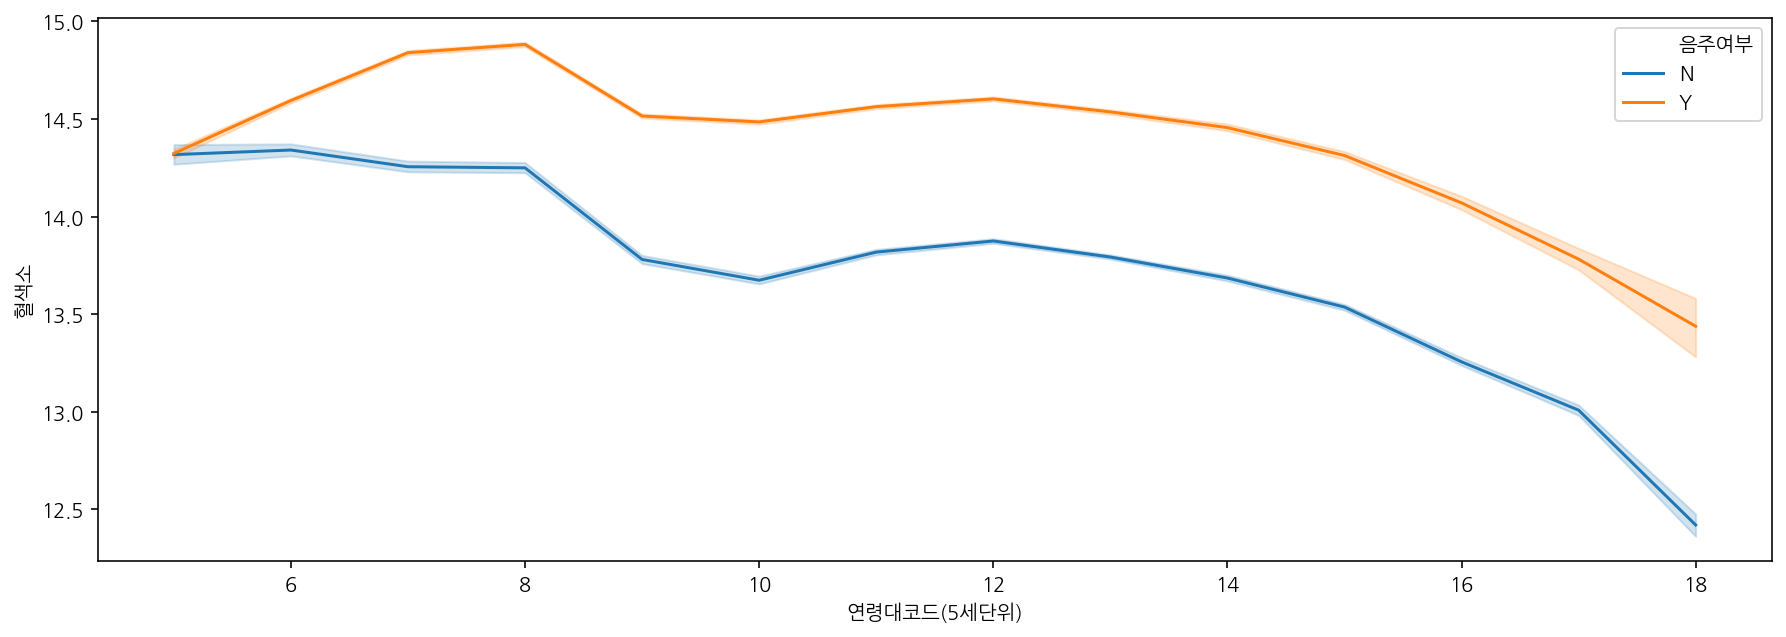

In [43]:
plt.figure(figsize = (15, 5))
sns.lineplot(data = df, x = '연령대코드(5세단위)', y = '혈색소', hue = '음주여부')

# boxplot

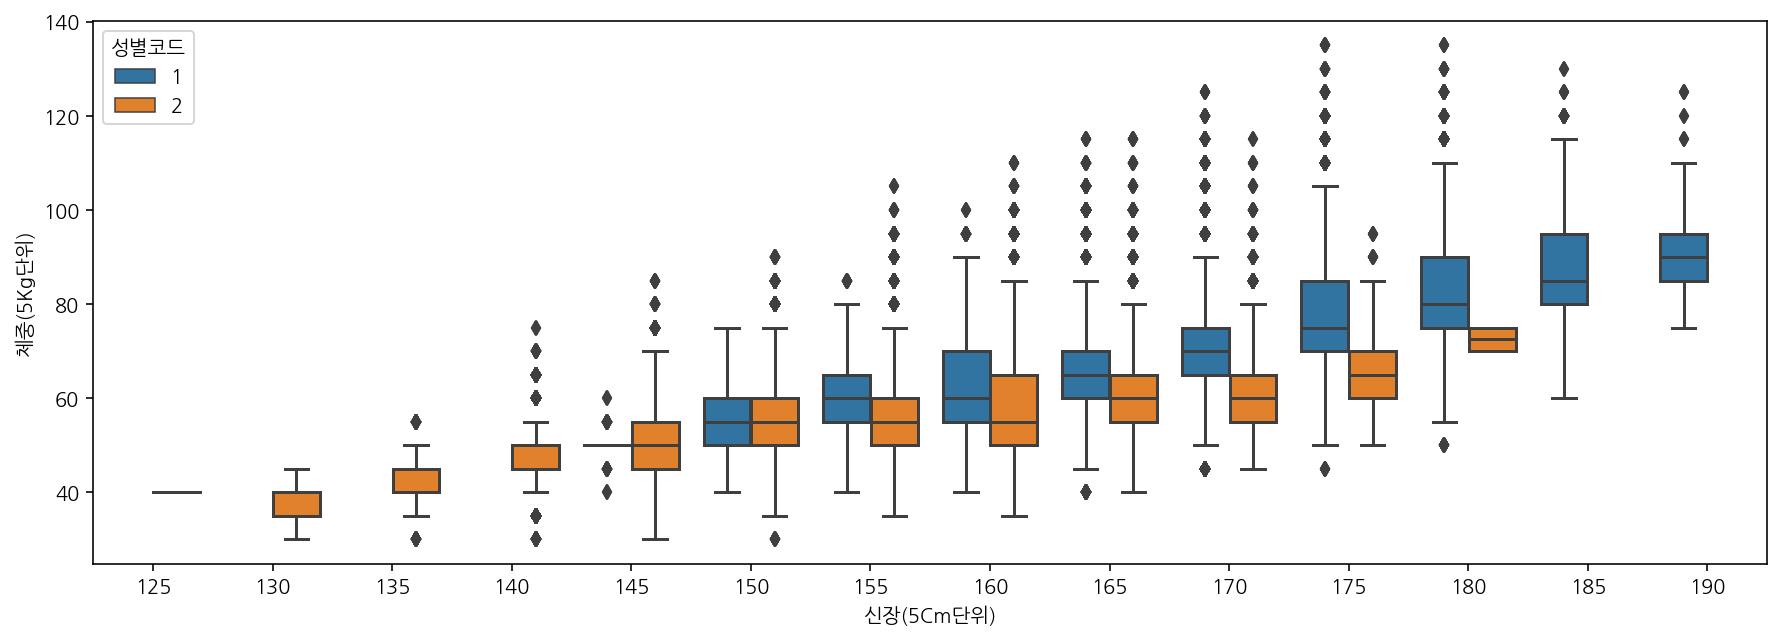

In [44]:
plt.figure(figsize = (15, 5))
sns.boxplot(data = df, x = '신장(5Cm단위)', y = '체중(5Kg단위)', hue = '성별코드')

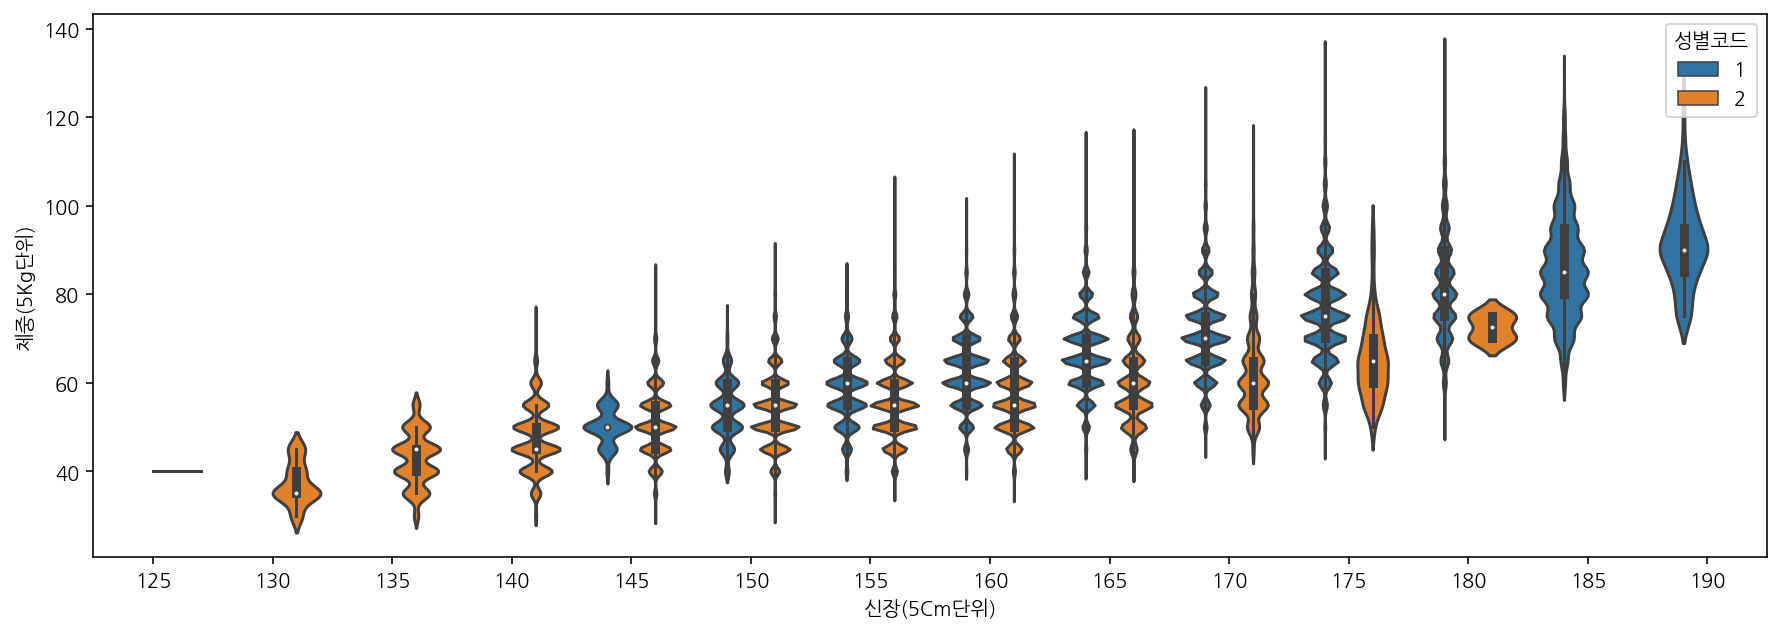

In [45]:
plt.figure(figsize = (15, 5))
sns.violinplot(data = df, x = '신장(5Cm단위)', y = '체중(5Kg단위)', hue = '성별코드')

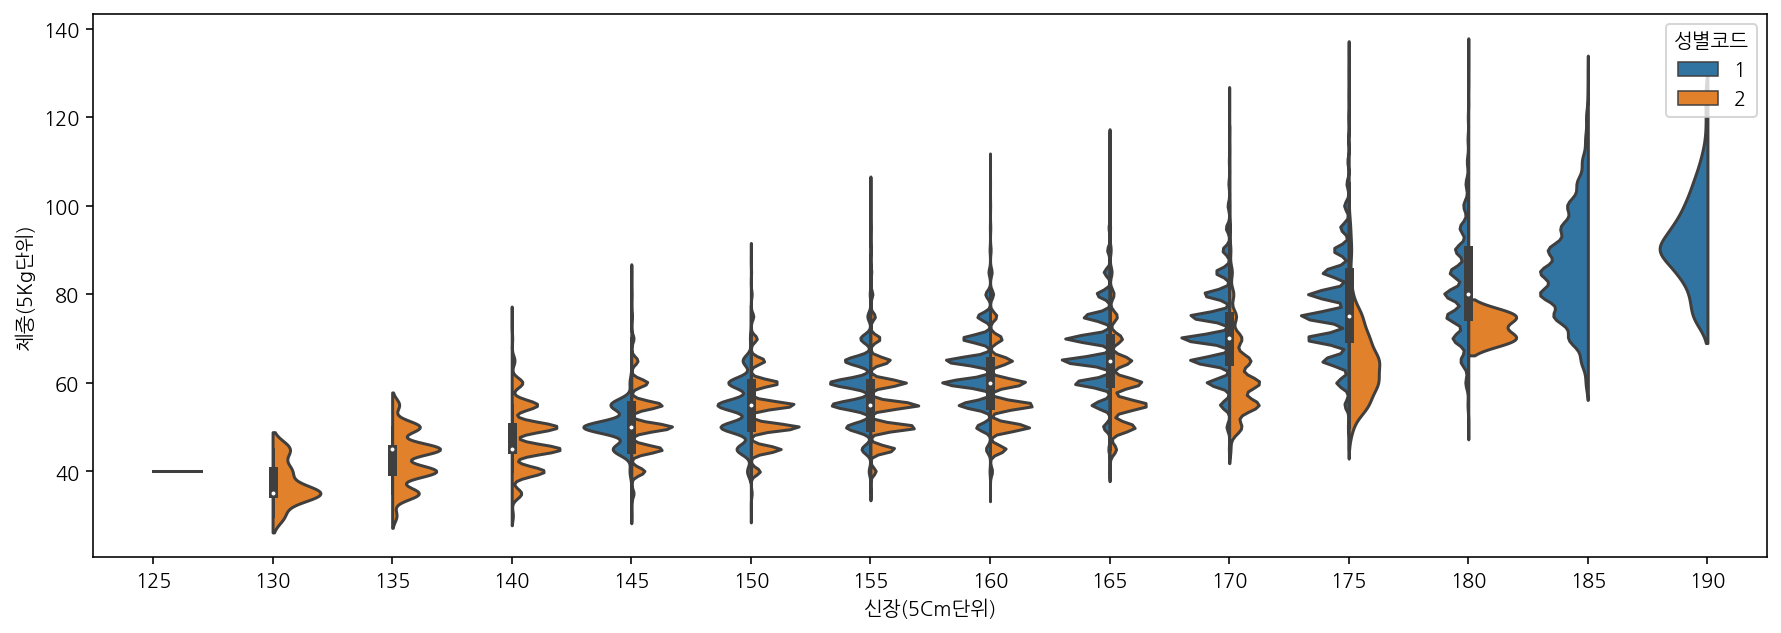

In [46]:
# 바이올린플롯은 split기능을 제공한다.
plt.figure(figsize = (15, 5))
sns.violinplot(data = df, x = '신장(5Cm단위)', y = '체중(5Kg단위)', hue = '성별코드', split = True)

 ## swarm plot
    * 범주형데이터를 산점도로 시각화

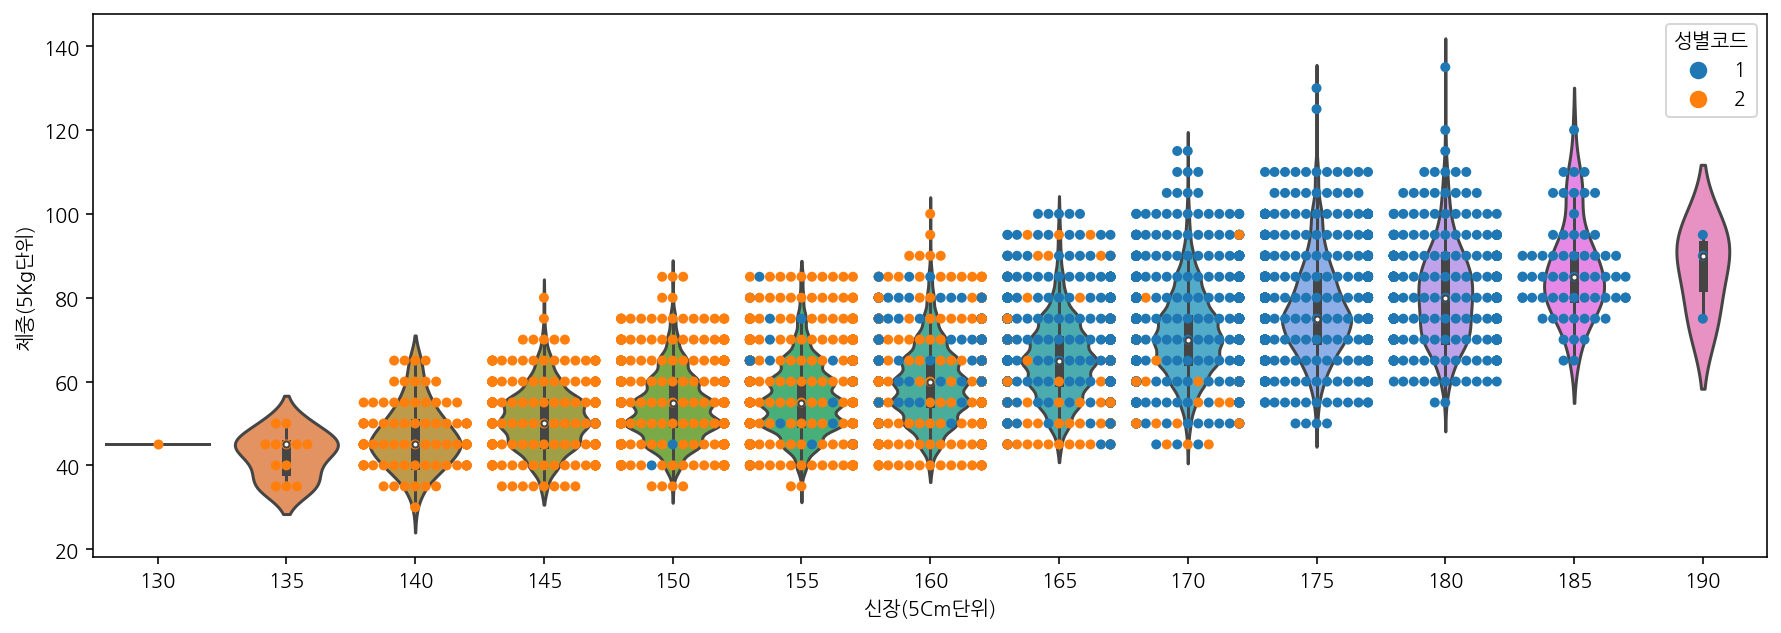

In [48]:
plt.figure(figsize = (15, 5))
sns.swarmplot(data = df_sample, x = '신장(5Cm단위)', y = '체중(5Kg단위)', hue = '성별코드')
sns.violinplot(data = df_sample, x = '신장(5Cm단위)', y = '체중(5Kg단위)')

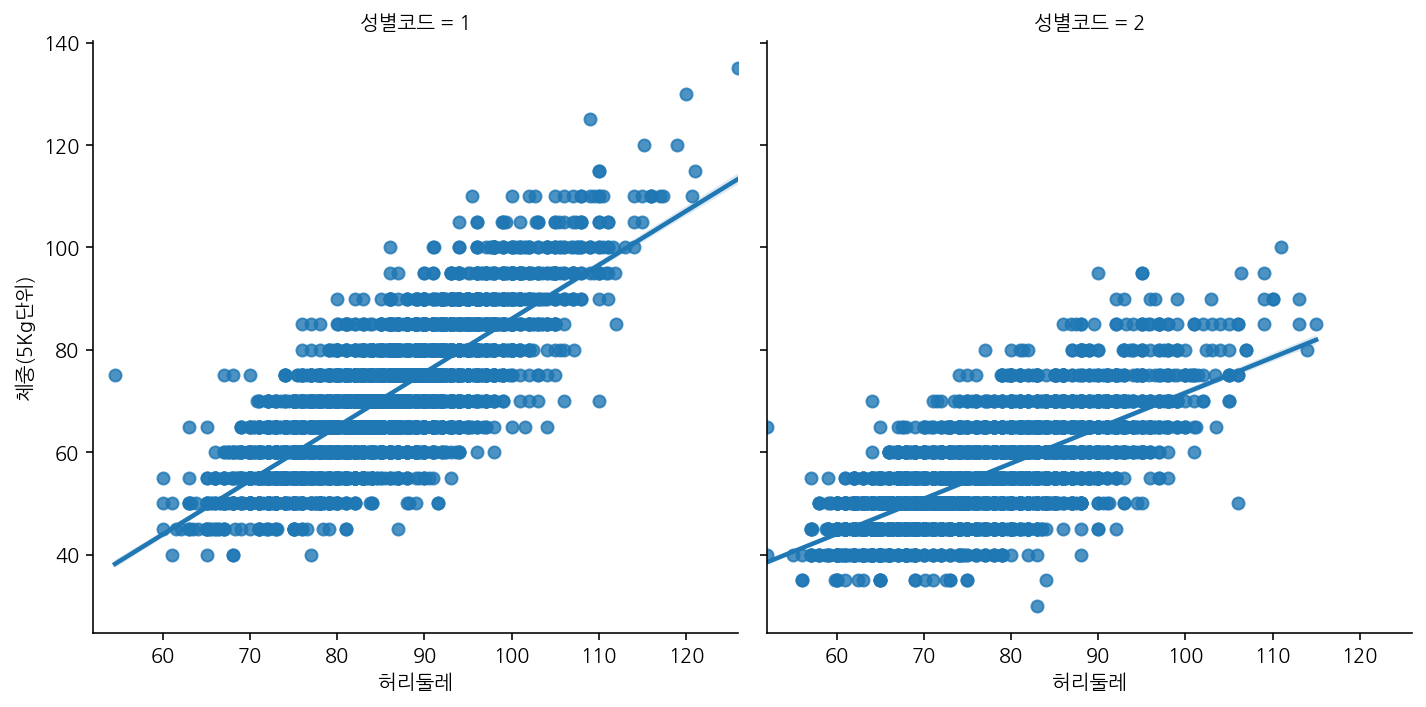

In [57]:
# 회귀인듯
sns.lmplot(data = df_sample, y = '체중(5Kg단위)', x = '허리둘레', col = '성별코드',)